## 소방안전 빅데이터 플랫폼
- 화재출동 현황_1721.csv : 2017년 ~ 2021년의 정보를 담고 있는 데이터  
- 화채출동 현황_22.csv : 2022년의 정보를 담고 있는 데이터
화재출동 현황 정보를 담고 있는 데이터  
-> "선제적 화재 대응 전략을 위한 실시간 건물 화재 피해지수 개발"을 주제로 건축/구조물 데이터만을 대상으로 진행

- 실효습도.csv : 상대습도를 실효습도로 변환한 데이터  
-> 분기별 화재발생빈도 : 봄 > 가을 > 여름 > 겨울, 분기별 사망인명피해자수 : 겨울 > 봄 > 가을 > 여름  
-> 화재발생빈도가 가장 작은 겨울이 사망인명피해자수가 제일 높고 여름이 제일 낮은 것을 볼때, 화재의 크기는 습도에 큰 영향을 받음을 알 수 있다. 따라서 실질적인 건조도를 나타내는 실효습도를 만들어 해당 특징을 반영하고자함.

- gas_after.csv : 네이버 지오코딩을 완료한 좌표데이터
- elec_after.csv : 네이버 지오코딩을 완료한 좌표데이터  
-> 화재출동 현황 데이터를 지오코딩하여 나온 건물별 좌표를 통해 전기, 가스 사용량 데이터를 mapping  

In [9]:
import pandas as pd

path = ""

In [10]:
df = pd.read_csv(path + '화재출동 현황_1721.csv', encoding='utf-8')
df.head(5)

,wrinvstg_no,fire_type_nm,buld_srtfrm,buld_strctr,buld_srtrf,buld_strct_dong_cnt,ground_nof,bstory_cnt,totar,bottom_area,...,vhcle_ign_bhf,fld_fire_se,fld_fire_ign_bhf,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit
0,170101044118025,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,6.0,1.0,1133.0,168.0,...,NaN,NaN,NaN,0.2,NaN,2.2,20.0,79.0,NaN,491
1,170101044947860,건축/구조물,양식(옥),치장벽돌조,슬라브가,1.0,2.0,1.0,248.0,81.0,...,NaN,NaN,NaN,-0.7,NaN,2.0,50.0,84.0,NaN,436
2,170102110954553,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,3.0,1.0,1175.0,490.0,...,NaN,NaN,NaN,-0.7,NaN,2.0,50.0,84.0,NaN,436
3,170101162928231,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,12.0,1.0,8989.0,816.0,...,NaN,NaN,NaN,4.0,NaN,1.3,50.0,69.0,NaN,433
4,170101140310046,기타(쓰레기 화재등),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,1.3,50.0,69.0,NaN,433


In [11]:
df1 = pd.read_csv(path + '화재출동 현황_22.csv', encoding='utf-8')
df1.head(5)

,wrinvstg_no,fire_type_nm,buld_srtfrm,buld_strctr,buld_srtrf,buld_strct_dong_cnt,ground_nof,bstory_cnt,totar,bottom_area,...,vhcle_ign_bhf,fld_fire_se,fld_fire_ign_bhf,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit
0,220101011323117,기타(쓰레기 화재등),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-8.5,NaN,1.9,320,41,NaN,2000
1,220101072841528,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,4.0,1.0,1214.00,275.00,...,NaN,NaN,NaN,-9.2,NaN,1.8,270,42,NaN,2000
2,220101084942081,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,3.0,1.0,805.11,234.37,...,NaN,NaN,NaN,-9.7,NaN,0.8,270,51,NaN,2000
3,220101094223698,건축/구조물,양식(옥),철근콘크리트조,슬라브가,NaN,2.0,1.0,307.64,0.00,...,NaN,NaN,NaN,-10.1,NaN,1.9,50,55,NaN,2000
4,220101090955661,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,17.0,5.0,12986.17,586.51,...,NaN,NaN,NaN,-10.1,NaN,1.9,50,55,NaN,2000


In [34]:
df = pd.concat([df, df1], axis=0)

In [35]:
df['fire_type_nm'].value_counts()

건축/구조물         26249
기타(쓰레기 화재등)     4834
자동차/철도차량        2362
임야               205
위험물/가스제조소등         7
선박/항공기             5
Name: fire_type_nm, dtype: int64

In [36]:
# 건축/구조물의 실시간 화재피해지수 개발을 위하여 건축/구조물만 발췌
df = df[df['fire_type_nm'] == '건축/구조물']
df

,wrinvstg_no,fire_type_nm,buld_srtfrm,buld_strctr,buld_srtrf,buld_strct_dong_cnt,ground_nof,bstory_cnt,totar,bottom_area,...,vhcle_ign_bhf,fld_fire_se,fld_fire_ign_bhf,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit
0,170101044118025,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,6.0,1.0,1133.00,168.00,...,NaN,NaN,NaN,0.2,NaN,2.2,20.0,79.0,NaN,491
1,170101044947860,건축/구조물,양식(옥),치장벽돌조,슬라브가,1.0,2.0,1.0,248.00,81.00,...,NaN,NaN,NaN,-0.7,NaN,2.0,50.0,84.0,NaN,436
2,170102110954553,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,3.0,1.0,1175.00,490.00,...,NaN,NaN,NaN,-0.7,NaN,2.0,50.0,84.0,NaN,436
3,170101162928231,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,12.0,1.0,8989.00,816.00,...,NaN,NaN,NaN,4.0,NaN,1.3,50.0,69.0,NaN,433
5,170101171947273,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,15.0,1.0,8074.00,529.00,...,NaN,NaN,NaN,6.7,NaN,0.7,340.0,61.0,NaN,442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5390,221231200402124,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,11.0,1.0,3034.65,419.23,...,NaN,NaN,NaN,1.7,NaN,1.7,20.0,64.0,NaN,1404
5392,221231220211917,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,15.0,1.0,6099.36,378.76,...,NaN,NaN,NaN,-0.8,NaN,1.4,20.0,75.0,NaN,1171
5393,221231225237879,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,2.0,1.0,245.46,81.84,...,NaN,NaN,NaN,-0.8,NaN,1.4,20.0,75.0,NaN,1171
5394,221231235942349,건축/구조물,양식(옥),철근콘크리트조,슬라브가,NaN,3.0,1.0,334.80,83.70,...,NaN,NaN,NaN,-1.0,NaN,0.9,340.0,77.0,NaN,1134


In [37]:
df.columns

Index(['wrinvstg_no', 'fire_type_nm', 'buld_srtfrm', 'buld_strctr',
       'buld_srtrf', 'buld_strct_dong_cnt', 'ground_nof', 'bstory_cnt',
       'totar', 'bottom_area', 'buld_sttus_nm', 'dth_cnt', 'injpsn_cnt',
       'dth_hnl_dmge_cnt', 'prprty_dmge_amt', 'fire_ocrn_yr', 'season_se_nm',
       'qtr_se', 'fire_ocrn_ymd', 'fire_ocrn_tm', 'fire_ocrn_mnth',
       'fire_ocrn_day', 'fire_ocrn_hour', 'fire_ocrn_min', 'daywk', 'frstt_nm',
       'ward_nm', 'lfdau_nm', 'dsp_reqre_time', 'fire_supesn_time', 'sido_nm',
       'sigungu_nm', 'emd_nm', 'cty_frmvl_se_nm', 'emd_se_nm', 'gis_x_axis',
       'gis_y_axis', 'longitude', 'la', 'spt_frstt_dist',
       'spt_safe_cnter_dist', 'spt_lfdau_dist', 'ign_htsrc_nm',
       'ign_htsrc_sclas_nm', 'ign_fctr_lclas_nm', 'ign_fctr_sclas_nm',
       'frst_igobj_lclas_nm', 'frst_igobj_sclas_nm', 'ign_mhrls_lclas_nm',
       'ign_mhrls_sclas_nm', 'cmbs_expobj_lclas_nm', 'cmbs_expobj_sclas_nm',
       'fclty_place_lclas_nm', 'fclty_place_mclas_nm', 'fclt

In [38]:
df

,wrinvstg_no,fire_type_nm,buld_srtfrm,buld_strctr,buld_srtrf,buld_strct_dong_cnt,ground_nof,bstory_cnt,totar,bottom_area,...,vhcle_ign_bhf,fld_fire_se,fld_fire_ign_bhf,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit
0,170101044118025,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,6.0,1.0,1133.00,168.00,...,NaN,NaN,NaN,0.2,NaN,2.2,20.0,79.0,NaN,491
1,170101044947860,건축/구조물,양식(옥),치장벽돌조,슬라브가,1.0,2.0,1.0,248.00,81.00,...,NaN,NaN,NaN,-0.7,NaN,2.0,50.0,84.0,NaN,436
2,170102110954553,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,3.0,1.0,1175.00,490.00,...,NaN,NaN,NaN,-0.7,NaN,2.0,50.0,84.0,NaN,436
3,170101162928231,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,12.0,1.0,8989.00,816.00,...,NaN,NaN,NaN,4.0,NaN,1.3,50.0,69.0,NaN,433
5,170101171947273,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,15.0,1.0,8074.00,529.00,...,NaN,NaN,NaN,6.7,NaN,0.7,340.0,61.0,NaN,442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5390,221231200402124,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,11.0,1.0,3034.65,419.23,...,NaN,NaN,NaN,1.7,NaN,1.7,20.0,64.0,NaN,1404
5392,221231220211917,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,15.0,1.0,6099.36,378.76,...,NaN,NaN,NaN,-0.8,NaN,1.4,20.0,75.0,NaN,1171
5393,221231225237879,건축/구조물,양식(옥),철근콘크리트조,슬라브가,1.0,2.0,1.0,245.46,81.84,...,NaN,NaN,NaN,-0.8,NaN,1.4,20.0,75.0,NaN,1171
5394,221231235942349,건축/구조물,양식(옥),철근콘크리트조,슬라브가,NaN,3.0,1.0,334.80,83.70,...,NaN,NaN,NaN,-1.0,NaN,0.9,340.0,77.0,NaN,1134


In [39]:
df[(df['longitude'] > 20) == False]['sigungu_nm']

0         강남구
1         마포구
2         강서구
3         강동구
5         양천구
         ... 
28119    서대문구
28120     마포구
28123    동대문구
28124     강북구
28125     송파구
Name: sigungu_nm, Length: 814, dtype: object

In [40]:
df['longitude']

0              NaN
1              NaN
2              NaN
3              NaN
5              NaN
           ...    
5390    126.948889
5392    127.085319
5393    127.129703
5394    126.921296
5395    126.898610
Name: longitude, Length: 26249, dtype: float64

In [41]:
# 상관계수 + 임의판단으로 제거하고 남은 컬럼들

df = df[['dth_hnl_dmge_cnt', 'qtr_se', 'fire_ocrn_ymd', 'fire_ocrn_hour',
       'spt_frstt_dist', 'spt_safe_cnter_dist', 'spt_lfdau_dist',
       'ign_htsrc_sclas_nm', 'ign_fctr_lclas_nm', 'fclty_place_mclas_nm',
       'frmng_trgt_yn', 'time_unit_tmprt', 'time_unit_ws', 'time_unit_wd',
       'time_unit_humidity', 'time_unit', 'emd_nm', 'sigungu_nm', 'prprty_dmge_amt', 'longitude', 'la']]

In [42]:
df

,dth_hnl_dmge_cnt,qtr_se,fire_ocrn_ymd,fire_ocrn_hour,spt_frstt_dist,spt_safe_cnter_dist,spt_lfdau_dist,ign_htsrc_sclas_nm,ign_fctr_lclas_nm,fclty_place_mclas_nm,...,time_unit_tmprt,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit,emd_nm,sigungu_nm,prprty_dmge_amt,longitude,la
0,0,1,20170101,0,4.0,3.0,0.0,전기적 아크(단락),전기적 요인,단독주택,...,0.2,2.2,20.0,79.0,491,논현동,강남구,13391,NaN,NaN
1,0,1,20170101,3,1.0,2.0,0.0,미상,미상,단독주택,...,-0.7,2.0,50.0,84.0,436,동교동,마포구,971,NaN,NaN
2,0,1,20170101,3,2.0,4.0,0.0,모닥불/ 연탄/ 숯,부주의,공동주택,...,-0.7,2.0,50.0,84.0,436,가양동,강서구,3669,NaN,NaN
3,0,1,20170101,12,1.0,1.0,0.0,전기적 아크(단락),전기적 요인,공동주택,...,4.0,1.3,50.0,69.0,433,성내동,강동구,374,NaN,NaN
5,0,1,20170101,14,3.0,1.0,0.0,담뱃불,부주의,공동주택,...,6.7,0.7,340.0,61.0,442,목동,양천구,30,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5390,0,1,20221231,17,1.7,2.3,0.0,기기 전도/복사열/기기발열,부주의,공동주택,...,1.7,1.7,20.0,64.0,1404,봉천동,관악구,113,126.948889,37.482005
5392,0,1,20221231,20,5.6,1.2,0.0,미상,미상,공동주택,...,-0.8,1.4,20.0,75.0,1171,잠실동,송파구,231,127.085319,37.503992
5393,0,1,20221231,20,3.5,1.0,0.0,화염 전도/복사열,부주의,음식점,...,-0.8,1.4,20.0,75.0,1171,천호동,강동구,5352,127.129703,37.542661
5394,0,1,20221231,21,1.6,1.2,0.0,모닥불/ 연탄/ 숯,부주의,음식점,...,-1.0,0.9,340.0,77.0,1134,서교동,마포구,258,126.921296,37.552125


In [43]:
df['fire_ocrn_ymd']

0       20170101
1       20170101
2       20170101
3       20170101
5       20170101
          ...   
5390    20221231
5392    20221231
5393    20221231
5394    20221231
5395    20221231
Name: fire_ocrn_ymd, Length: 26249, dtype: int64

In [44]:
df = df[df['la'].isna() == False]

In [45]:
df

,dth_hnl_dmge_cnt,qtr_se,fire_ocrn_ymd,fire_ocrn_hour,spt_frstt_dist,spt_safe_cnter_dist,spt_lfdau_dist,ign_htsrc_sclas_nm,ign_fctr_lclas_nm,fclty_place_mclas_nm,...,time_unit_tmprt,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit,emd_nm,sigungu_nm,prprty_dmge_amt,longitude,la
18,0,1,20170102,11,3.0,1.0,0.0,불꽃/ 스파크/ 정전기,전기적 요인,단독주택,...,6.3,2.3,230.0,82.0,294,면목동,중랑구,1551,127.089946,37.583679
19,0,1,20170102,12,5.0,2.0,0.0,화염 전도/복사열,부주의,음식점,...,7.6,2.1,230.0,70.0,409,역삼동,강남구,275,127.027563,37.499615
20,0,1,20170102,14,5.0,4.0,0.0,모닥불/ 연탄/ 숯,부주의,음식점,...,9.2,3.1,200.0,59.0,331,잠원동,서초구,113,127.016532,37.514922
21,0,1,20170102,15,2.0,2.0,0.0,라이터불/ 성냥불,부주의,공동주택,...,8.3,3.6,250.0,64.0,305,중계동,노원구,51,127.083044,37.647071
23,0,1,20170102,18,4.0,4.0,0.0,라이터불/ 성냥불,방화의심,단독주택,...,6.4,2.1,270.0,73.0,221,자양동,광진구,100,127.077849,37.534442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5390,0,1,20221231,17,1.7,2.3,0.0,기기 전도/복사열/기기발열,부주의,공동주택,...,1.7,1.7,20.0,64.0,1404,봉천동,관악구,113,126.948889,37.482005
5392,0,1,20221231,20,5.6,1.2,0.0,미상,미상,공동주택,...,-0.8,1.4,20.0,75.0,1171,잠실동,송파구,231,127.085319,37.503992
5393,0,1,20221231,20,3.5,1.0,0.0,화염 전도/복사열,부주의,음식점,...,-0.8,1.4,20.0,75.0,1171,천호동,강동구,5352,127.129703,37.542661
5394,0,1,20221231,21,1.6,1.2,0.0,모닥불/ 연탄/ 숯,부주의,음식점,...,-1.0,0.9,340.0,77.0,1134,서교동,마포구,258,126.921296,37.552125


### 만들었던 실효습도 데이터 로드

In [46]:
humid = pd.read_csv('실효습도_1722.csv', encoding='cp949')

In [47]:
humid

,일시,실효습도
0,20170101,57.472920
1,20170102,57.376250
2,20170103,56.262250
3,20170104,54.273750
4,20170105,57.619269
...,...,...
2186,20221227,51.520554
2187,20221228,51.857163
2188,20221229,54.608379
2189,20221230,54.237138


In [48]:
# 실효습도 데이터와 통합

df = pd.merge(df, humid, left_on = 'fire_ocrn_ymd', right_on = '일시')

In [50]:
gas = pd.read_csv('gas_after.csv')
gas

,지번,사용량,lat,lon
0,서울특별시 강남구 개포동 1055-0,75516.833333,37.471707,127.052513
1,서울특별시 강남구 개포동 1057-9,32441.416667,37.470495,127.050902
2,서울특별시 강남구 개포동 1163-4,7276.750000,37.472395,127.050518
3,서울특별시 강남구 개포동 1163-5,4499.166667,37.472278,127.050639
4,서울특별시 강남구 개포동 1163-6,2843.500000,37.472161,127.050760
...,...,...,...,...
102739,서울특별시 중랑구 중화동 95-0,1409.166667,37.602084,127.083718
102740,서울특별시 중랑구 중화동 96-0,5831.583333,37.602117,127.083410
102741,서울특별시 중랑구 중화동 99-1,2854.916667,37.602409,127.082835
102742,서울특별시 중랑구 중화동 99-5,2382.750000,37.601909,127.082905


In [57]:
# 좌표 기반 가장 가까운 위치의 사용량 불러오기

def cal(dong, lon, lat):
    global gas
    df = gas[gas['지번'].str.contains(dong, na=False)].copy()
    df['distance'] = (df['lon'] - lon)**2 + (df['lat'] - lat)**2
    idx = df['distance'].argmin()
    return df['사용량'].iloc[idx]

In [59]:
from tqdm import tqdm

gas_use = []
for i in tqdm(range(df.shape[0])):
    try:
        gas_use.append(cal(df['emd_nm'][i], df['longitude'][i], df['la'][i]))
    except:
        gas_use.append(-1)
    

100%|████████████████████████████████████████████████████████████████████████████| 25435/25435 [18:38<00:00, 22.74it/s]


In [65]:
df['가스사용량(KWh)'] = gas_use

In [63]:
gas_use.count(-1)

4

In [78]:
# 가스 사용량이 집계되지 않는 데이터는 전체 평균으로 대체(4건)
df['가스사용량(KWh)'].replace(-1, df['가스사용량(KWh)'].mean(), inplace=True)

In [79]:
df

,dth_hnl_dmge_cnt,qtr_se,fire_ocrn_ymd,fire_ocrn_hour,spt_frstt_dist,spt_safe_cnter_dist,spt_lfdau_dist,ign_htsrc_sclas_nm,ign_fctr_lclas_nm,fclty_place_mclas_nm,...,time_unit_humidity,time_unit,emd_nm,sigungu_nm,prprty_dmge_amt,longitude,la,일시,실효습도,가스사용량(KWh)
0,0,1,20170102,11,3.0,1.0,0.0,불꽃/ 스파크/ 정전기,전기적 요인,단독주택,...,82.0,294,면목동,중랑구,1551,127.089946,37.583679,20170102,57.376250,3519.916667
1,0,1,20170102,12,5.0,2.0,0.0,화염 전도/복사열,부주의,음식점,...,70.0,409,역삼동,강남구,275,127.027563,37.499615,20170102,57.376250,41868.750000
2,0,1,20170102,14,5.0,4.0,0.0,모닥불/ 연탄/ 숯,부주의,음식점,...,59.0,331,잠원동,서초구,113,127.016532,37.514922,20170102,57.376250,6635.750000
3,0,1,20170102,15,2.0,2.0,0.0,라이터불/ 성냥불,부주의,공동주택,...,64.0,305,중계동,노원구,51,127.083044,37.647071,20170102,57.376250,457670.916667
4,0,1,20170102,18,4.0,4.0,0.0,라이터불/ 성냥불,방화의심,단독주택,...,73.0,221,자양동,광진구,100,127.077849,37.534442,20170102,57.376250,4711.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25430,0,1,20221231,17,1.7,2.3,0.0,기기 전도/복사열/기기발열,부주의,공동주택,...,64.0,1404,봉천동,관악구,113,126.948889,37.482005,20221231,52.885305,20237.500000
25431,0,1,20221231,20,5.6,1.2,0.0,미상,미상,공동주택,...,75.0,1171,잠실동,송파구,231,127.085319,37.503992,20221231,52.885305,14469.333333
25432,0,1,20221231,20,3.5,1.0,0.0,화염 전도/복사열,부주의,음식점,...,75.0,1171,천호동,강동구,5352,127.129703,37.542661,20221231,52.885305,1892.000000
25433,0,1,20221231,21,1.6,1.2,0.0,모닥불/ 연탄/ 숯,부주의,음식점,...,77.0,1134,서교동,마포구,258,126.921296,37.552125,20221231,52.885305,9634.000000


In [82]:
df.rename(columns={'prprty_dmge_amt':'재산피해액', 'dth_hnl_dmge_cnt':'사망인명피해수', 'qtr_se':'분기구분',   'fire_ocrn_ymd':'화재발생일자',   'fire_ocrn_hour':'화재발생시',   'spt_frstt_dist':'현장소방서거리',   'spt_safe_cnter_dist':'현장안전센터거리',   'spt_lfdau_dist':'현장소방지역대거리',   'ign_htsrc_sclas_nm':'발화열원소분류명',   'ign_fctr_lclas_nm':'발화요인대분류명',   'fclty_place_mclas_nm':'시설장소중분류명',   'frmng_trgt_yn':'방화관리대상여부',   'time_unit_tmprt':'시간단위기온',   'time_unit_ws':'시간단위풍속',   'time_unit_wd':'시간단위풍향',   'time_unit_humidity':'시간단위습도',   'time_unit':'시간단위가시거리'}, inplace=True)

In [83]:
df.columns

Index(['사망인명피해수', '분기구분', '화재발생일자', '화재발생시', '현장소방서거리', '현장안전센터거리',
       '현장소방지역대거리', '발화열원소분류명', '발화요인대분류명', '시설장소중분류명', '방화관리대상여부', '시간단위기온',
       '시간단위풍속', '시간단위풍향', '시간단위습도', '시간단위가시거리', 'emd_nm', 'sigungu_nm',
       '재산피해액', 'longitude', 'la', '일시', '실효습도', '가스사용량(KWh)'],
      dtype='object')

In [85]:
elec = pd.read_csv('elec_after.csv')
elec

,지번,사용량,lat,lon
0,서울특별시 강남구 개포동 1-0,16.500000,37.494165,127.072944
1,서울특별시 강남구 개포동 1055-0,70796.583333,37.471707,127.052513
2,서울특별시 강남구 개포동 1057-9,12800.750000,37.470495,127.050902
3,서울특별시 강남구 개포동 1163-0,2550.750000,37.472860,127.050034
4,서울특별시 강남구 개포동 1163-2,5557.416667,37.472628,127.050277
...,...,...,...,...
148393,서울특별시 중랑구 중화동 95-0,2796.666667,37.602084,127.083718
148394,서울특별시 중랑구 중화동 96-0,4413.000000,37.602117,127.083410
148395,서울특별시 중랑구 중화동 99-1,1048.000000,37.602409,127.082835
148396,서울특별시 중랑구 중화동 99-5,1332.916667,37.601909,127.082905


In [86]:
def cal_el(dong, lon, lat):
    global elec
    df = elec[elec['지번'].str.contains(dong, na=False)].copy()
    df['distance'] = (df['lon'] - lon)**2 + (df['lat'] - lat)**2
    idx = df['distance'].argmin()
    return df['사용량'].iloc[idx]

In [87]:
from tqdm import tqdm

elec_use = []
for i in tqdm(range(df.shape[0])):
    try:
        elec_use.append(cal(df['emd_nm'][i], df['longitude'][i], df['la'][i]))
    except:
        elec_use.append(-1)
    

100%|████████████████████████████████████████████████████████████████████████████| 25435/25435 [19:12<00:00, 22.07it/s]


In [89]:
elec_use.count(-1)

4

In [90]:
df['전기사용량(KWh)'] = elec_use

In [91]:
# 전기 사용량이 집계되지 않는 데이터는 전체 평균으로 대체(4건)
df['전기사용량(KWh)'].replace(-1, df['전기사용량(KWh)'].mean(), inplace=True)

In [93]:
df = df.rename(columns = {'la':'lat', 'longitude': 'lon'})
df.drop(['일시', 'end_nm', 'sigungu_nm'], axis=1, inplace=True)

In [98]:
df.columns

Index(['사망인명피해수', '분기구분', '화재발생일자', '화재발생시', '현장소방서거리', '현장안전센터거리',
       '현장소방지역대거리', '발화열원소분류명', '발화요인대분류명', '시설장소중분류명', '방화관리대상여부', '시간단위기온',
       '시간단위풍속', '시간단위풍향', '시간단위습도', '시간단위가시거리', '재산피해액', 'lon', 'lat', '실효습도',
       '가스사용량(KWh)', '전기사용량(KWh)'],
      dtype='object')

# 최종 데이터 전처리 및 EDA

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set_context('talk')

In [255]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import *

In [257]:
df.head()

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화열원소분류명,발화요인대분류명,시설장소중분류명,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh)
0,0,1,20170102,11,3.0,1.0,0.0,불꽃/ 스파크/ 정전기,전기적 요인,단독주택,...,2.3,230.0,82.0,294,1551,127.089946,37.583679,57.37625,3519.916667,3519.916667
1,0,1,20170102,12,5.0,2.0,0.0,화염 전도/복사열,부주의,음식점,...,2.1,230.0,70.0,409,275,127.027563,37.499615,57.37625,41868.750000,41868.750000
2,0,1,20170102,14,5.0,4.0,0.0,모닥불/ 연탄/ 숯,부주의,음식점,...,3.1,200.0,59.0,331,113,127.016532,37.514922,57.37625,6635.750000,6635.750000
3,0,1,20170102,15,2.0,2.0,0.0,라이터불/ 성냥불,부주의,공동주택,...,3.6,250.0,64.0,305,51,127.083044,37.647071,57.37625,457670.916667,457670.916667
4,0,1,20170102,18,4.0,4.0,0.0,라이터불/ 성냥불,방화의심,단독주택,...,2.1,270.0,73.0,221,100,127.077849,37.534442,57.37625,4711.583333,4711.583333


In [258]:
df.columns

Index(['사망인명피해수', '분기구분', '화재발생일자', '화재발생시', '현장소방서거리', '현장안전센터거리',
       '현장소방지역대거리', '발화열원소분류명', '발화요인대분류명', '시설장소중분류명', '방화관리대상여부', '시간단위기온',
       '시간단위풍속', '시간단위풍향', '시간단위습도', '시간단위가시거리', '재산피해액', 'lon', 'lat', '실효습도',
       '가스사용량(KWh)', '전기사용량(KWh)'],
      dtype='object')

In [259]:
df.shape

(25435, 22)

In [260]:
df.describe()

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,시간단위기온,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh)
count,25435.000000,25435.000000,2.543500e+04,25435.000000,25435.000000,25435.000000,25428.000000,25432.000000,25401.00000,25401.000000,25433.000000,25435.000000,2.543500e+04,25435.000000,25435.000000,25435.000000,2.543500e+04,2.543500e+04
mean,0.069825,2.386279,2.019425e+07,12.788166,3.233481,1.624183,0.013033,13.788047,2.27867,203.149482,57.613652,1561.346019,6.538065e+03,126.991683,37.547719,50.222397,8.039815e+04,8.039815e+04
std,0.502959,1.104506,1.718865e+04,6.588993,1.802131,0.910752,0.162504,11.667529,1.18116,106.348491,20.530783,568.828745,4.526261e+05,0.084579,0.051787,10.132099,3.938795e+05,3.938795e+05
min,0.000000,1.000000,2.017010e+07,0.000000,0.000000,0.000000,0.000000,-17.900000,0.00000,0.000000,7.000000,27.000000,0.000000e+00,126.768359,37.433655,23.555118,-2.106500e+04,-2.106500e+04
25%,0.000000,1.000000,2.018051e+07,8.000000,2.000000,1.000000,0.000000,4.200000,1.40000,90.000000,42.000000,1142.000000,3.300000e+01,126.920763,37.504482,42.934538,2.480973e+03,2.480973e+03
50%,0.000000,2.000000,2.019091e+07,13.000000,3.000000,1.400000,0.000000,15.300000,2.10000,250.000000,56.000000,1915.000000,1.400000e+02,127.007200,37.545560,49.988997,5.541667e+03,5.541667e+03
75%,0.000000,3.000000,2.021053e+07,18.000000,4.000000,2.000000,0.000000,23.700000,3.00000,290.000000,73.000000,2000.000000,7.050000e+02,127.054777,37.579768,56.985942,1.854508e+04,1.854508e+04
max,33.000000,4.000000,2.022123e+07,23.000000,44.000000,20.000000,6.000000,39.400000,9.10000,360.000000,100.000000,5000.000000,7.161334e+07,127.181221,37.692915,78.401574,2.099043e+07,2.099043e+07


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25435 entries, 0 to 25434
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사망인명피해수     25435 non-null  int64  
 1   분기구분        25435 non-null  int64  
 2   화재발생일자      25435 non-null  int64  
 3   화재발생시       25435 non-null  int64  
 4   현장소방서거리     25435 non-null  float64
 5   현장안전센터거리    25435 non-null  float64
 6   현장소방지역대거리   25428 non-null  float64
 7   발화열원소분류명    25435 non-null  object 
 8   발화요인대분류명    25435 non-null  object 
 9   시설장소중분류명    25435 non-null  object 
 10  방화관리대상여부    25435 non-null  object 
 11  시간단위기온      25432 non-null  float64
 12  시간단위풍속      25401 non-null  float64
 13  시간단위풍향      25401 non-null  float64
 14  시간단위습도      25433 non-null  float64
 15  시간단위가시거리    25435 non-null  int64  
 16  재산피해액       25435 non-null  int64  
 17  lon         25435 non-null  float64
 18  lat         25435 non-null  float64
 19  실효습도        25435 non-nul

In [262]:
df['발화열원소분류명'].value_counts()

발화열원소분류명
전기적 아크(단락)        6424
기기 전도/복사열         4814
담뱃불               3435
화염 전도/복사열         2651
미상                2031
불꽃/ 스파크/ 정전기      1321
기기 전도/복사열/기기발열     825
기타(작동기기)           562
라이터불/ 성냥불          537
용접/ 절단/ 연마         502
기타(불꽃/불티)          441
모닥불/ 연탄/ 숯         433
촛불                 305
기타                 264
기타(마찰/전도/복사)       208
화학반응열              202
굴뚝(연통) 아궁이         178
마찰열/마찰 스파크          89
기타(담뱃불/라이터불)        83
향불                  47
쓰레기/ 논밭두렁           25
비화                  21
발효열                 10
낙뢰                   9
햇볕                   7
역화                   6
폭탄/ 탄약               3
폭죽                   1
돋보기 효과               1
Name: count, dtype: int64

In [263]:
## 워드클라우드에 출력할 딕셔너리를 만듦.
words = df['발화열원소분류명'].value_counts().to_dict()

In [264]:
wordcloud = WordCloud(
    font_path = 'malgun.ttf', # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='Blues' # 워드클라우드 모양 설정
).generate_from_frequencies(words)

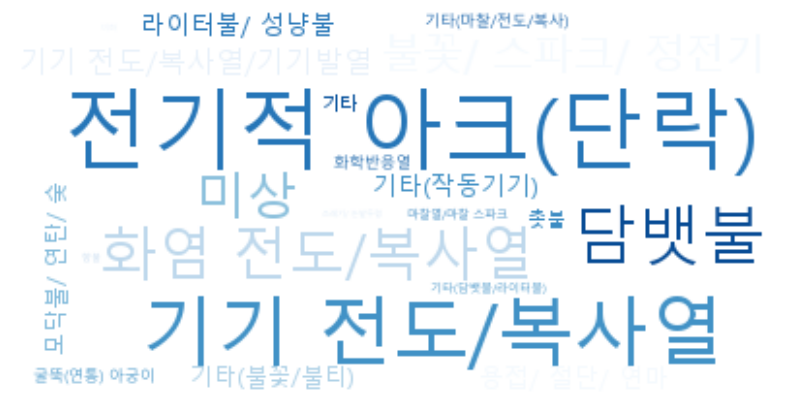

In [265]:
#사이즈 설정 및 출력
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게
plt.show()
#plt.savefig('test.png')

In [266]:
df.drop(['발화열원소분류명'],axis=1, inplace=True)
#대분류명 있어서 소분류명은 제거

In [267]:
df.shape

(25435, 21)

## 범주형 변수 분포 확인

In [268]:
df['발화요인대분류명'].value_counts()
#df['ign_fctr_lclas_nm'].value_counts()

발화요인대분류명
부주의         14236
전기적 요인       6963
미상           2091
기계적 요인       1137
방화            273
화학적 요인        214
방화의심          206
기타            120
가스누출(폭발)       86
제품결함           77
자연적인 요인        29
교통사고            3
Name: count, dtype: int64

In [269]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Serif',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'STIXGeneral',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'cmmi10',
 'STIXSizeFourSym',
 'cmsy10',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Sans',
 'cmtt10',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'cmex10',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'cmb10',
 'DejaVu Serif',
 'cmr10',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'cmss10',
 'DejaVu Serif',
 'Arial Rounded MT Bold',
 'Yj SOSEL SemiBold',
 'Ami R',
 'Swis721 BT',
 'Tw Cen MT',
 'Segoe UI',
 'Lucida Bright',
 'Verdana',
 'HYGraphic-Medium',
 'Lucida Bright',
 'Yj BONMOKGAK Medium ',
 'Comic Sans MS',
 'MoeumT R',
 'Papyrus',
 'Haan YGodic 240',
 'ahn2006-M',
 'Comic Sans MS',
 'Californian FB',
 'MYingHei_18030_C-Medium',
 'Guli

In [270]:
plt.rcParams['font.family'] = 'Batang'

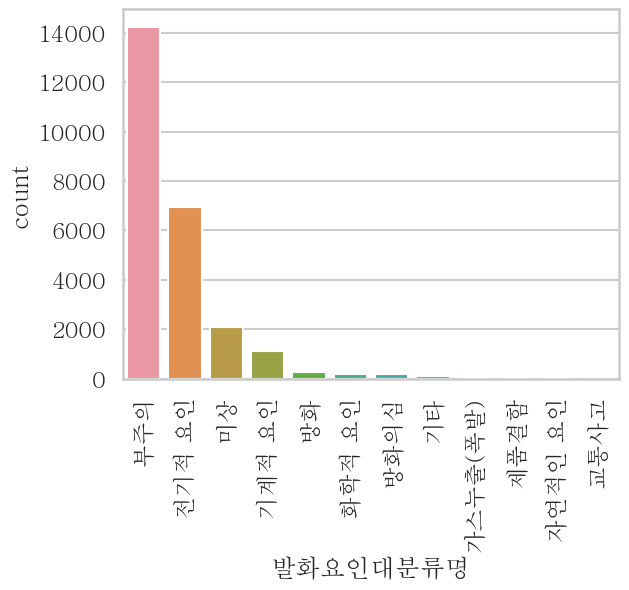

In [271]:
plt.xticks(rotation = 90)
plt.rc('font', size=10)
plt.rc('xtick', labelsize=15)
sns.countplot(x='발화요인대분류명', data = df, order = df['발화요인대분류명'].value_counts().index)
plt.show()

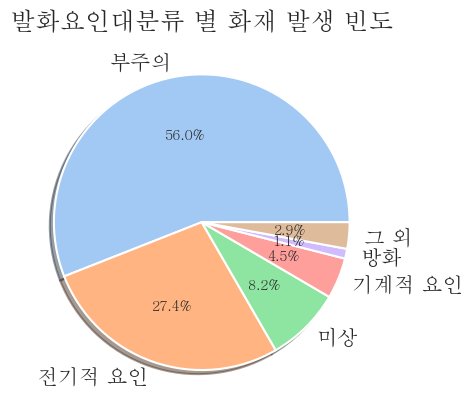

In [272]:
labels = ['부주의','전기적 요인','미상','기계적 요인','방화','그 외']
values = [14236, 6963, 2091, 1137, 273, len(df) - df['발화요인대분류명'].value_counts()[0:5].sum()]

plt.pie(values, labels = labels,autopct='%.1f%%',shadow=True)
plt.rc('font', size=8)
plt.rc('xtick', labelsize=10) 
plt.title('발화요인대분류 별 화재 발생 빈도')
plt.show()

In [273]:
df['시설장소중분류명'].value_counts()
#df['fclty_place_mclas_nm'].value_counts()

시설장소중분류명
공동주택      7943
단독주택      5314
음식점       3491
일반업무      2317
일상서비스     1352
판매시설      1154
작업장        545
기타건축물      504
공장시설       301
숙박시설       281
의료시설       235
학교         216
창고시설       197
연구/학원      194
종교시설       194
오락시설       193
자동차시설      173
기타주택       160
위락시설       120
노유자시설      116
운동시설       100
공공기관        94
건강시설        80
역사/터미널      69
공연장         21
전시장         18
위생시설        11
청소년시설        8
지중시설         7
동식물시설        5
관람장          5
군사시설         5
문화재          4
발전시설         4
항공시설         3
항만시설         1
Name: count, dtype: int64

In [274]:
df['시설장소중분류명'].value_counts()[0:6]

시설장소중분류명
공동주택     7943
단독주택     5314
음식점      3491
일반업무     2317
일상서비스    1352
판매시설     1154
Name: count, dtype: int64

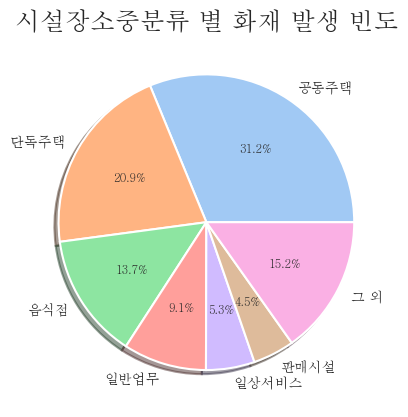

In [275]:
labels = ['공동주택','단독주택','음식점','일반업무','일상서비스','판매시설','그 외']
values = [7943,5314,3491,2317,1352,1154,len(df) - df['시설장소중분류명'].value_counts()[0:6].sum()]

plt.pie(values, labels = labels,autopct='%.1f%%',shadow=True)
plt.rc('font', size=10)
plt.rc('xtick', labelsize=10)
plt.title('시설장소중분류 별 화재 발생 빈도')
plt.show()

In [276]:
df['방화관리대상여부'].value_counts()

방화관리대상여부
N    17417
Y     8018
Name: count, dtype: int64

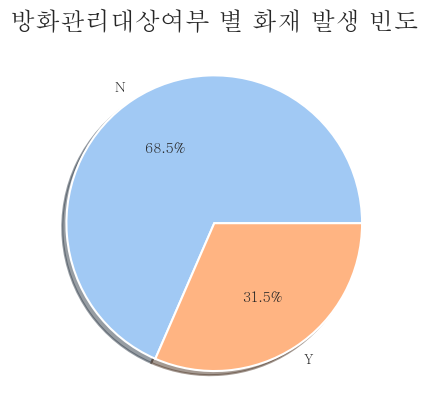

In [277]:
labels = ['N','Y']
values = [17417, 8018]

plt.pie(values, labels = labels,autopct='%.1f%%',shadow=True)
plt.rc('font', size=10)
plt.rc('xtick', labelsize=20)
plt.title('방화관리대상여부 별 화재 발생 빈도')
plt.show()

<AxesSubplot: xlabel='방화관리대상여부', ylabel='사망인명피해수'>

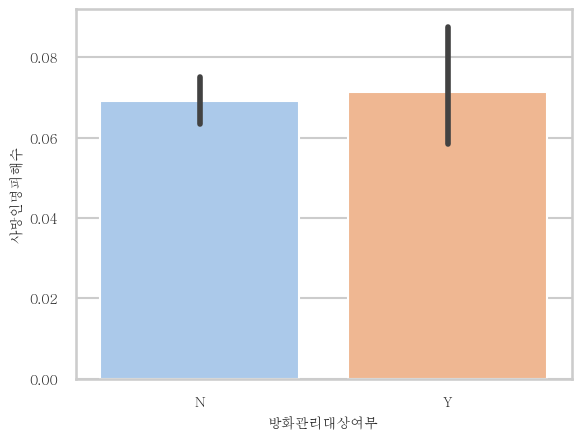

In [278]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10) 
sns.barplot( x='방화관리대상여부',y='사망인명피해수', data =df)
#방화관리대상일 때 사망인명피해수가 조금 더 높은 경향 있음. 근데 퍼센트이고, 0이 넘 많아서 딱히 의미있지는 않을듯

## 결측치 처리

In [279]:
df.isnull().sum()

사망인명피해수        0
분기구분           0
화재발생일자         0
화재발생시          0
현장소방서거리        0
현장안전센터거리       0
현장소방지역대거리      7
발화요인대분류명       0
시설장소중분류명       0
방화관리대상여부       0
시간단위기온         3
시간단위풍속        34
시간단위풍향        34
시간단위습도         2
시간단위가시거리       0
재산피해액          0
lon            0
lat            0
실효습도           0
가스사용량(KWh)     0
전기사용량(KWh)     0
dtype: int64

In [280]:
df['현장소방지역대거리'].value_counts()

현장소방지역대거리
0.0    25203
1.0       94
2.0       27
3.0       14
0.5       13
0.6        7
1.3        6
1.5        5
4.0        5
2.1        5
1.7        4
0.8        4
0.3        4
1.6        3
1.8        3
0.4        3
1.2        3
2.7        3
0.7        3
1.1        2
2.9        2
1.9        2
3.5        1
2.3        1
3.3        1
3.7        1
0.2        1
6.0        1
3.4        1
2.2        1
4.6        1
1.4        1
0.9        1
2.8        1
2.4        1
Name: count, dtype: int64

In [281]:
df[df['현장소방지역대거리'].isnull()]

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh)
7308,0,3,20180719,19,5.0,2.0,NaN,부주의,음식점,N,...,2.3,290.0,58.0,1556,216,127.097469,37.503106,55.443543,12286.750000,12286.750000
7381,0,3,20180723,13,6.0,2.0,NaN,부주의,공동주택,N,...,1.7,290.0,47.0,1887,78,127.095251,37.499622,49.234254,62916.750000,62916.750000
16505,0,3,20200822,0,3.0,3.0,NaN,기계적 요인,학교,N,...,1.9,50.0,87.0,1787,86,126.948617,37.457534,65.036412,7032.800000,7032.800000
18243,0,1,20210131,4,3.0,3.0,NaN,전기적 요인,공동주택,N,...,1.7,70.0,71.0,2000,11,126.839540,37.571837,41.422710,12009.666667,12009.666667
21868,0,1,20220226,12,5.6,3.0,NaN,부주의,공장시설,N,...,4.9,200.0,69.0,1333,2243,126.824384,37.534797,42.399702,2167.833333,2167.833333
22440,0,2,20220418,18,2.3,0.5,NaN,부주의,음식점,N,...,3.3,250.0,25.0,2000,181,126.929967,37.520685,41.834103,26112.000000,26112.000000
24203,0,3,20220915,2,1.5,0.3,NaN,전기적 요인,단독주택,N,...,4.8,70.0,69.0,2000,49,127.011650,37.553221,57.965817,7164.833333,7164.833333


## 하버사인거리 측정해서 인접 위치의 거리로 대체

In [282]:
from math import sin, cos, sqrt, atan2

#라이브러리가 설치가 안돼서 하버사인 거리 구하는 함수 정의
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # radius of Earth in kilometers

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [283]:
df_missing = df[df['현장소방지역대거리'].isnull()]

if not df_missing.empty:
    for index, row in df_missing.iterrows():
        lat1, lon1 = row['lat'], row['lon']
        min_distance = float('inf')  # 무한대로 초기화
        closest_building = None
        
        for _, neighbor_row in df.iterrows():
            if not pd.isnull(neighbor_row['현장소방지역대거리']):
                lat2, lon2 = neighbor_row['lat'], neighbor_row['lon']
                distance = haversine_distance(lat1, lon1, lat2, lon2)
                
                if distance < min_distance:
                    min_distance = distance
                    closest_building = neighbor_row['현장소방지역대거리']
        
        if closest_building is not None:
            df.at[index, '현장소방지역대거리'] = closest_building

In [284]:
df.isnull().sum()

사망인명피해수        0
분기구분           0
화재발생일자         0
화재발생시          0
현장소방서거리        0
현장안전센터거리       0
현장소방지역대거리      0
발화요인대분류명       0
시설장소중분류명       0
방화관리대상여부       0
시간단위기온         3
시간단위풍속        34
시간단위풍향        34
시간단위습도         2
시간단위가시거리       0
재산피해액          0
lon            0
lat            0
실효습도           0
가스사용량(KWh)     0
전기사용량(KWh)     0
dtype: int64

In [285]:
df.shape

(25435, 21)

In [286]:
df['시간단위기온'].value_counts()

시간단위기온
 25.1    120
 22.7    118
 24.6    117
 25.9    117
 25.6    116
        ... 
-15.5      1
-17.4      1
-15.8      1
 37.3      1
 39.3      1
Name: count, Length: 547, dtype: int64

In [287]:
df[df['시간단위기온'].isnull()]

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh)
3564,0,4,20171012,15,6.0,2.0,0.0,부주의,공동주택,N,...,NaN,NaN,NaN,2000,45,126.900500,37.464436,58.282020,1968.833333,1968.833333
3565,0,4,20171012,16,4.0,1.0,0.0,부주의,음식점,N,...,NaN,NaN,NaN,1912,101,126.887794,37.482471,58.282020,1880.416667,1880.416667
16554,0,3,20200826,13,1.0,1.0,0.0,전기적 요인,공동주택,N,...,4.3,70.0,60.0,1800,20,126.845469,37.561445,65.280399,7925.583333,7925.583333


In [288]:
df[df['시간단위풍속'].isnull()]

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh)
1376,0,2,20170424,19,1.0,2.0,0.0,전기적 요인,판매시설,N,...,NaN,NaN,31.0,2000,254,126.922114,37.556473,39.553782,4155.000000,4155.000000
1379,0,2,20170425,0,1.0,1.0,0.0,부주의,판매시설,Y,...,NaN,NaN,55.0,1992,331,127.126311,37.535888,41.139564,17029.333333,17029.333333
3564,0,4,20171012,15,6.0,2.0,0.0,부주의,공동주택,N,...,NaN,NaN,NaN,2000,45,126.900500,37.464436,58.282020,1968.833333,1968.833333
3565,0,4,20171012,16,4.0,1.0,0.0,부주의,음식점,N,...,NaN,NaN,NaN,1912,101,126.887794,37.482471,58.282020,1880.416667,1880.416667
3587,0,4,20171014,13,10.0,1.0,0.0,부주의,일반업무,N,...,NaN,NaN,23.0,1995,44,126.798590,37.583839,58.028784,1293.250000,1293.250000
3588,0,4,20171014,14,4.0,2.0,0.0,부주의,단독주택,N,...,NaN,NaN,27.0,2000,29,126.826129,37.533442,58.028784,1988.909091,1988.909091
3780,1,4,20171103,19,3.0,1.0,0.0,부주의,단독주택,N,...,NaN,NaN,50.0,1532,1412,127.086064,37.582459,43.128300,1108.583333,1108.583333
4177,0,4,20171205,11,1.0,1.0,0.0,부주의,공동주택,N,...,NaN,NaN,25.0,1959,36,127.011258,37.558490,47.452593,3596.666667,3596.666667
4178,0,4,20171205,11,4.0,2.0,0.0,부주의,음식점,N,...,NaN,NaN,25.0,1959,1322,127.027505,37.625344,47.452593,12249.000000,12249.000000
4179,0,4,20171205,12,2.0,2.0,0.0,전기적 요인,기타건축물,N,...,NaN,NaN,25.0,1962,3289,127.057448,37.548739,47.452593,2953.083333,2953.083333


In [289]:
df[df['시간단위풍향'].isnull()]

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh)
1376,0,2,20170424,19,1.0,2.0,0.0,전기적 요인,판매시설,N,...,NaN,NaN,31.0,2000,254,126.922114,37.556473,39.553782,4155.000000,4155.000000
1379,0,2,20170425,0,1.0,1.0,0.0,부주의,판매시설,Y,...,NaN,NaN,55.0,1992,331,127.126311,37.535888,41.139564,17029.333333,17029.333333
3564,0,4,20171012,15,6.0,2.0,0.0,부주의,공동주택,N,...,NaN,NaN,NaN,2000,45,126.900500,37.464436,58.282020,1968.833333,1968.833333
3565,0,4,20171012,16,4.0,1.0,0.0,부주의,음식점,N,...,NaN,NaN,NaN,1912,101,126.887794,37.482471,58.282020,1880.416667,1880.416667
3587,0,4,20171014,13,10.0,1.0,0.0,부주의,일반업무,N,...,NaN,NaN,23.0,1995,44,126.798590,37.583839,58.028784,1293.250000,1293.250000
3588,0,4,20171014,14,4.0,2.0,0.0,부주의,단독주택,N,...,NaN,NaN,27.0,2000,29,126.826129,37.533442,58.028784,1988.909091,1988.909091
3780,1,4,20171103,19,3.0,1.0,0.0,부주의,단독주택,N,...,NaN,NaN,50.0,1532,1412,127.086064,37.582459,43.128300,1108.583333,1108.583333
4177,0,4,20171205,11,1.0,1.0,0.0,부주의,공동주택,N,...,NaN,NaN,25.0,1959,36,127.011258,37.558490,47.452593,3596.666667,3596.666667
4178,0,4,20171205,11,4.0,2.0,0.0,부주의,음식점,N,...,NaN,NaN,25.0,1959,1322,127.027505,37.625344,47.452593,12249.000000,12249.000000
4179,0,4,20171205,12,2.0,2.0,0.0,전기적 요인,기타건축물,N,...,NaN,NaN,25.0,1962,3289,127.057448,37.548739,47.452593,2953.083333,2953.083333


In [290]:
df[df['시간단위습도'].isnull()]

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh)
3564,0,4,20171012,15,6.0,2.0,0.0,부주의,공동주택,N,...,NaN,NaN,NaN,2000,45,126.900500,37.464436,58.28202,1968.833333,1968.833333
3565,0,4,20171012,16,4.0,1.0,0.0,부주의,음식점,N,...,NaN,NaN,NaN,1912,101,126.887794,37.482471,58.28202,1880.416667,1880.416667


### 3564, 3565번째 행이 4가지 컬럼(기온, 풍향, 풍속, 습도) 에서 모두 결측치가 있어서 저 두개의 행은 제거 하기로 결정       

In [291]:
df = df.drop([3564,3565], axis = 0)

In [292]:
df.isnull().sum()

사망인명피해수        0
분기구분           0
화재발생일자         0
화재발생시          0
현장소방서거리        0
현장안전센터거리       0
현장소방지역대거리      0
발화요인대분류명       0
시설장소중분류명       0
방화관리대상여부       0
시간단위기온         1
시간단위풍속        32
시간단위풍향        32
시간단위습도         0
시간단위가시거리       0
재산피해액          0
lon            0
lat            0
실효습도           0
가스사용량(KWh)     0
전기사용량(KWh)     0
dtype: int64

In [293]:
#16554 번째 행의 시간단위 기온은 20200826의 평균으로 대체
df[df['시간단위기온'].isnull()]

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh)
16554,0,3,20200826,13,1.0,1.0,0.0,전기적 요인,공동주택,N,...,4.3,70.0,60.0,1800,20,126.845469,37.561445,65.280399,7925.583333,7925.583333


In [294]:
value = df[df['화재발생일자'] == 20200826]['시간단위기온'].mean()
print(value)

32.6


In [295]:
df.loc[16554,'시간단위기온'] = value

In [296]:
df.isnull().sum()

사망인명피해수        0
분기구분           0
화재발생일자         0
화재발생시          0
현장소방서거리        0
현장안전센터거리       0
현장소방지역대거리      0
발화요인대분류명       0
시설장소중분류명       0
방화관리대상여부       0
시간단위기온         0
시간단위풍속        32
시간단위풍향        32
시간단위습도         0
시간단위가시거리       0
재산피해액          0
lon            0
lat            0
실효습도           0
가스사용량(KWh)     0
전기사용량(KWh)     0
dtype: int64

In [297]:
df[df['시간단위풍속'].isnull()]['화재발생일자'].unique()

array([20170424, 20170425, 20171014, 20171103, 20171205, 20171206,
       20190929, 20191215, 20210107], dtype=int64)

In [298]:
#일정하게 타임스탬프가 찍힌 시계열 데이터가 아니라서 보간법으로 결측치 대체 불가
#32개의 데이터 삭제 결정
df.dropna(subset=['시간단위풍속'],inplace = True)

In [299]:
#결측치 처리 완.
df.isnull().sum()

사망인명피해수       0
분기구분          0
화재발생일자        0
화재발생시         0
현장소방서거리       0
현장안전센터거리      0
현장소방지역대거리     0
발화요인대분류명      0
시설장소중분류명      0
방화관리대상여부      0
시간단위기온        0
시간단위풍속        0
시간단위풍향        0
시간단위습도        0
시간단위가시거리      0
재산피해액         0
lon           0
lat           0
실효습도          0
가스사용량(KWh)    0
전기사용량(KWh)    0
dtype: int64

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25401 entries, 0 to 25434
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사망인명피해수     25401 non-null  int64  
 1   분기구분        25401 non-null  int64  
 2   화재발생일자      25401 non-null  int64  
 3   화재발생시       25401 non-null  int64  
 4   현장소방서거리     25401 non-null  float64
 5   현장안전센터거리    25401 non-null  float64
 6   현장소방지역대거리   25401 non-null  float64
 7   발화요인대분류명    25401 non-null  object 
 8   시설장소중분류명    25401 non-null  object 
 9   방화관리대상여부    25401 non-null  object 
 10  시간단위기온      25401 non-null  float64
 11  시간단위풍속      25401 non-null  float64
 12  시간단위풍향      25401 non-null  float64
 13  시간단위습도      25401 non-null  float64
 14  시간단위가시거리    25401 non-null  int64  
 15  재산피해액       25401 non-null  int64  
 16  lon         25401 non-null  float64
 17  lat         25401 non-null  float64
 18  실효습도        25401 non-null  float64
 19  가스사용량(KWh)  25401 non-null  fl

## numerical 변수 확인, 이상치 확인

In [301]:
df.describe()

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,시간단위기온,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh)
count,25401.000000,25401.000000,2.540100e+04,25401.000000,25401.000000,25401.000000,25401.000000,25401.000000,25401.00000,25401.000000,25401.000000,25401.000000,2.540100e+04,25401.000000,25401.000000,25401.000000,2.540100e+04,2.540100e+04
mean,0.069879,2.384867,2.019427e+07,12.786071,3.233203,1.624034,0.013047,13.803890,2.27867,203.149482,57.629896,1561.016574,6.544243e+03,126.991701,37.547719,50.225119,8.047095e+04,8.047095e+04
std,0.503256,1.103922,1.718300e+04,6.590029,1.801984,0.910821,0.162589,11.660631,1.18116,106.348491,20.531955,569.044274,4.529289e+05,0.084580,0.051790,10.137004,3.941249e+05,3.941249e+05
min,0.000000,1.000000,2.017010e+07,0.000000,0.000000,0.000000,0.000000,-17.900000,0.00000,0.000000,7.000000,27.000000,0.000000e+00,126.768359,37.433655,23.555118,-2.106500e+04,-2.106500e+04
25%,0.000000,1.000000,2.018051e+07,8.000000,2.000000,1.000000,0.000000,4.200000,1.40000,90.000000,42.000000,1141.000000,3.300000e+01,126.920782,37.504483,42.921303,2.481667e+03,2.481667e+03
50%,0.000000,2.000000,2.019091e+07,13.000000,3.000000,1.400000,0.000000,15.300000,2.10000,250.000000,56.000000,1915.000000,1.400000e+02,127.007210,37.545541,50.004072,5.543333e+03,5.543333e+03
75%,0.000000,3.000000,2.021060e+07,18.000000,4.000000,2.000000,0.000000,23.700000,3.00000,290.000000,73.000000,2000.000000,7.050000e+02,127.054785,37.579765,56.985942,1.855608e+04,1.855608e+04
max,33.000000,4.000000,2.022123e+07,23.000000,44.000000,20.000000,6.000000,39.400000,9.10000,360.000000,100.000000,5000.000000,7.161334e+07,127.181221,37.692915,78.401574,2.099043e+07,2.099043e+07


현장소방서거리, 현장안전센터거리, 시간단위가시거리, 재산피해액, 전기사용량, 가스사용량 -> 이상치 의심

## 사망인명피해수

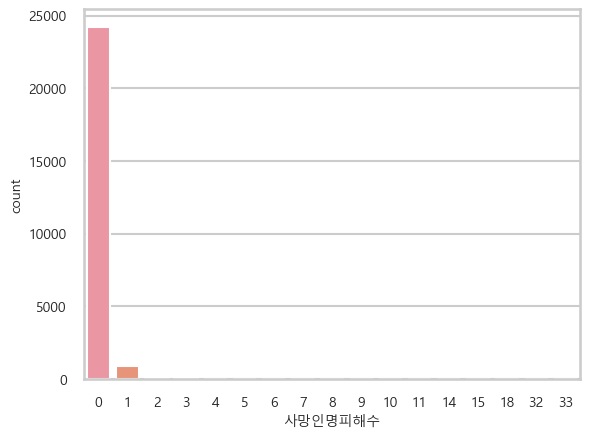

In [302]:
plt.rc('font', family='Malgun Gothic') #글꼴
sns.countplot(x='사망인명피해수', data = df)
#sns.countplot(x='dth_hnl_dmge_cnt', data = df)
plt.show()

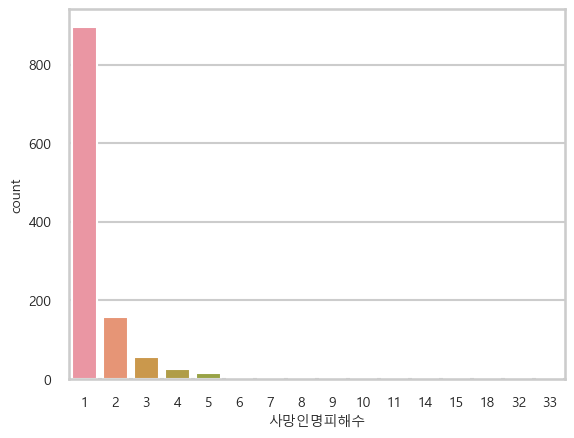

In [303]:
sns.countplot(x='사망인명피해수', data = df[df['사망인명피해수']>0])
plt.show()
#1명이상의 사상자 수에 대해서

In [304]:
df[df['사망인명피해수']>0]['사망인명피해수'].value_counts()

사망인명피해수
1     896
2     157
3      56
4      25
5      14
6       5
8       3
7       3
10      2
14      1
18      1
32      1
15      1
11      1
9       1
33      1
Name: count, dtype: int64

## 분기구분

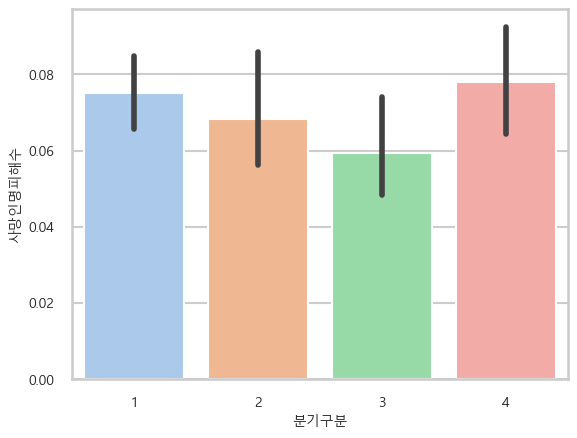

In [305]:
sns.barplot( x='분기구분',y='사망인명피해수', data =df)
plt.show()

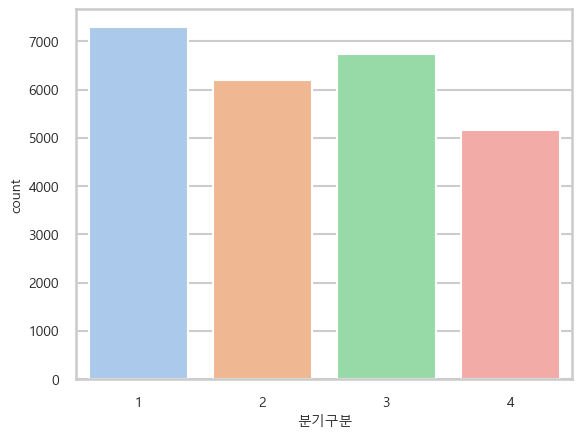

In [306]:
sns.countplot(x='분기구분', data = df)
plt.show()
#분기별 화재 발생 빈도 

## 화재발생시

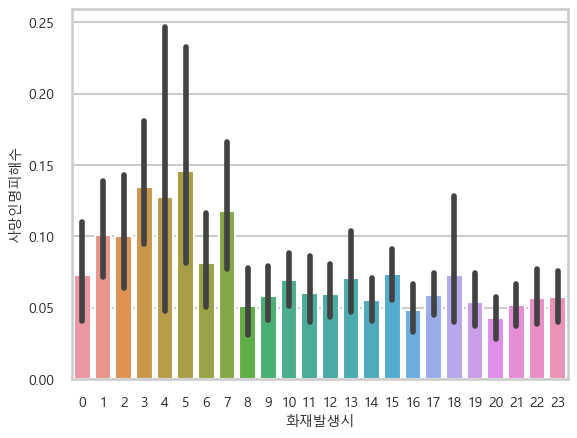

In [307]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.barplot( x='화재발생시',y='사망인명피해수', data =df)
plt.show()
#주로 새벽에 사망인명피해수가 높은 걸 볼 수 있음. 새벽이라 주위 신고나 사람들의 대처가 늦었던 것으로 예상..

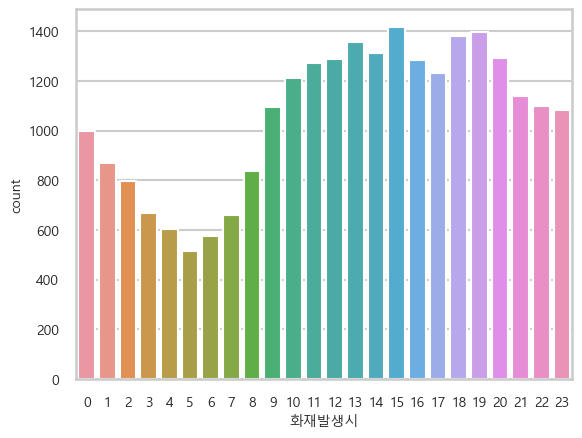

In [308]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.countplot(x='화재발생시', data = df)
plt.show()
#몇시에 가장 화재가 많이 발생했는가?
#사망인명피해수는 새벽타임이 가장 높았지만 빈도로 보면 새벽에 가장 화재가 조금 났음
#새벽에는 대형화재가 많이 발생할 것으로 짐작 가능

# 기상 요인
### 시간단위기온, 시간단위풍속, 시간단위풍향, 시간단위습도, 평균 상대습도(%), 실효습도

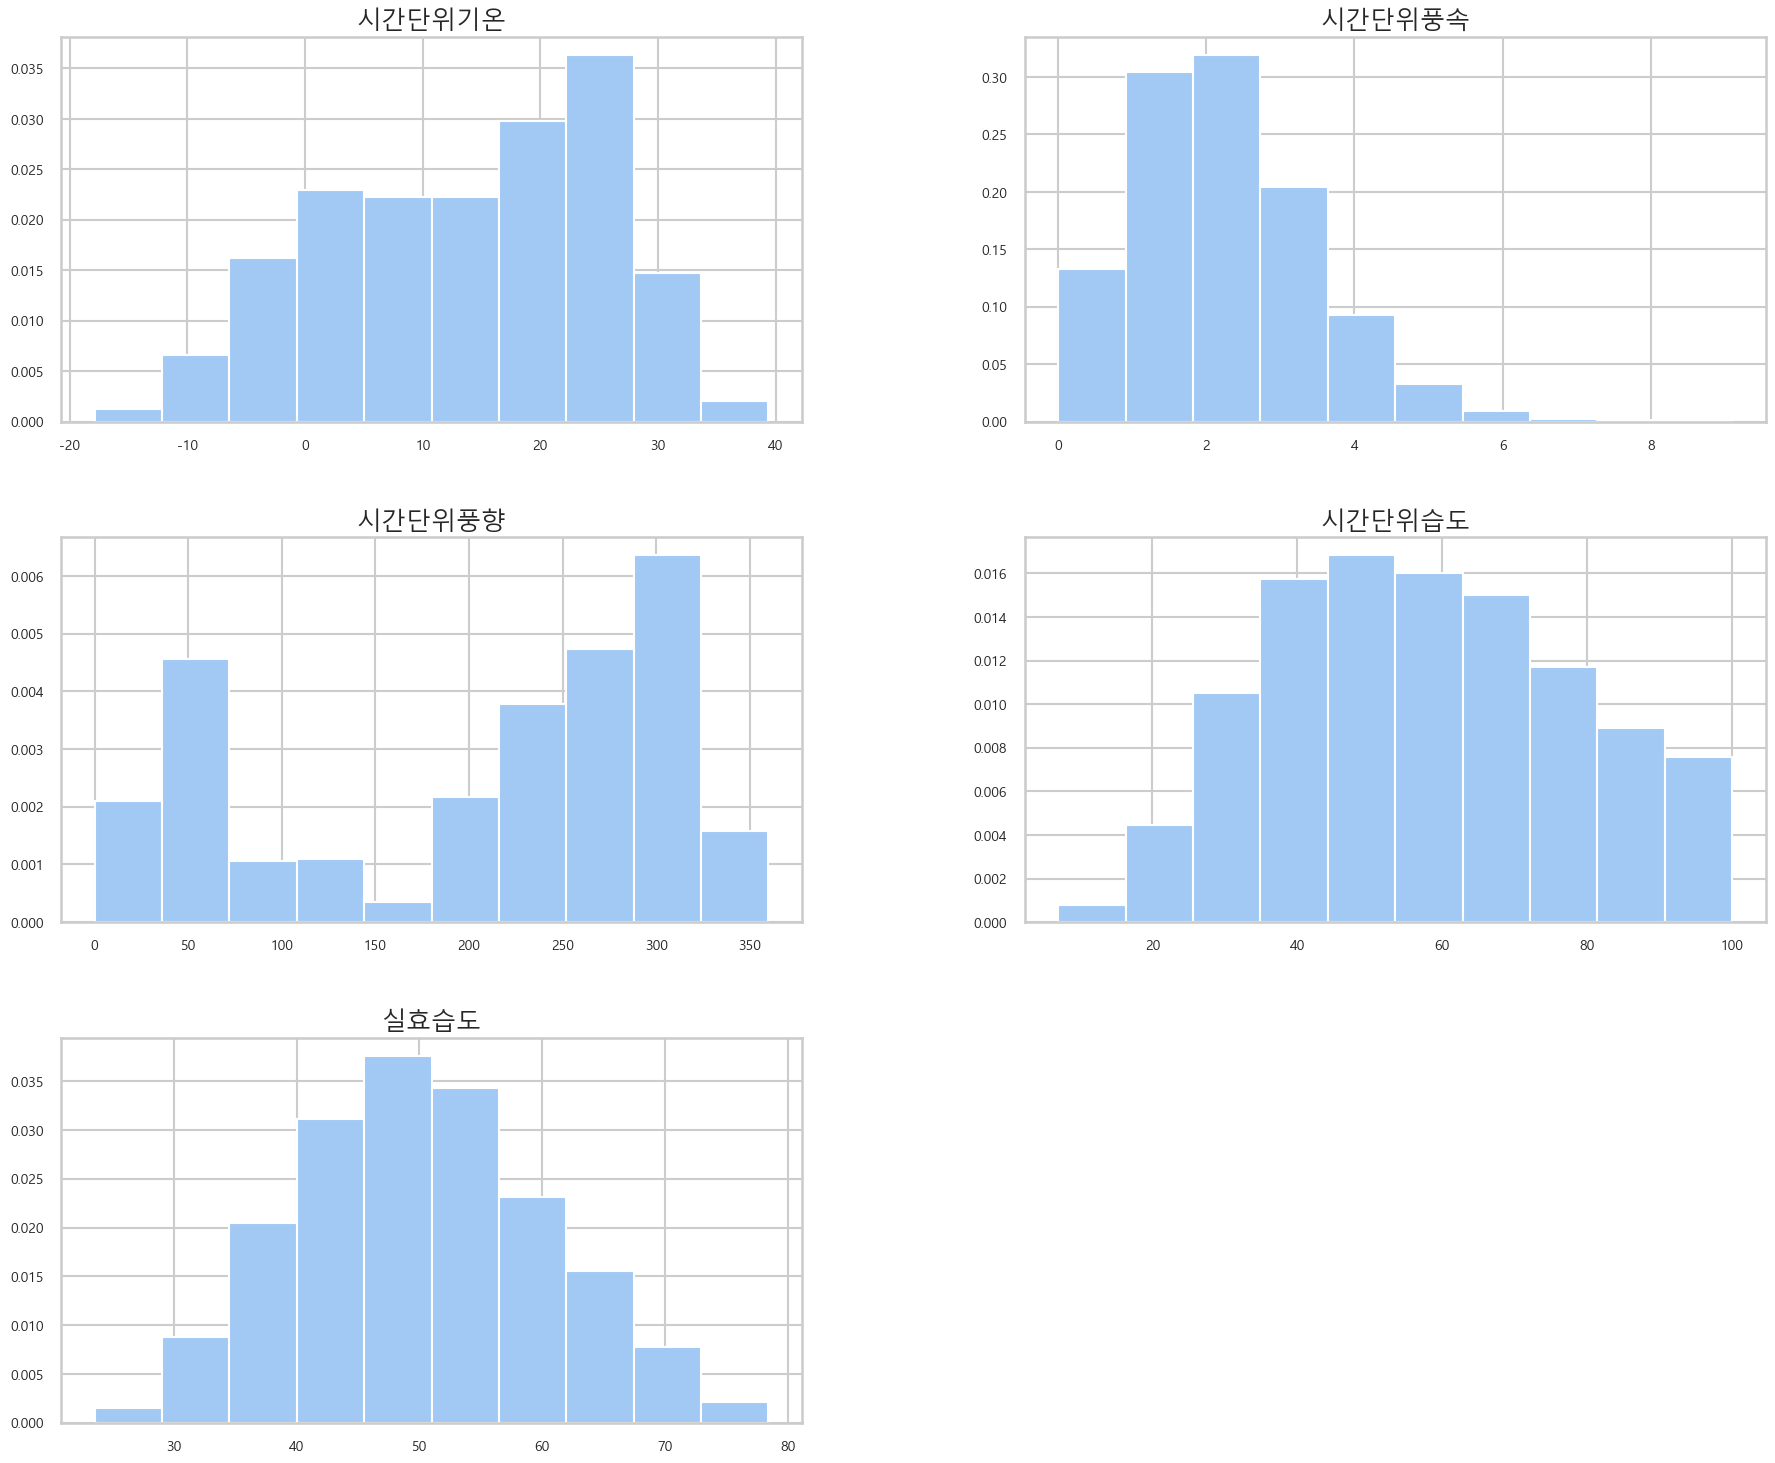

In [309]:
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)
weather_df = df[['시간단위기온','시간단위풍속','시간단위풍향','시간단위습도','실효습도']]
weather_df.hist(figsize=(22,18), density=True)
plt.show()

## 전기사용량

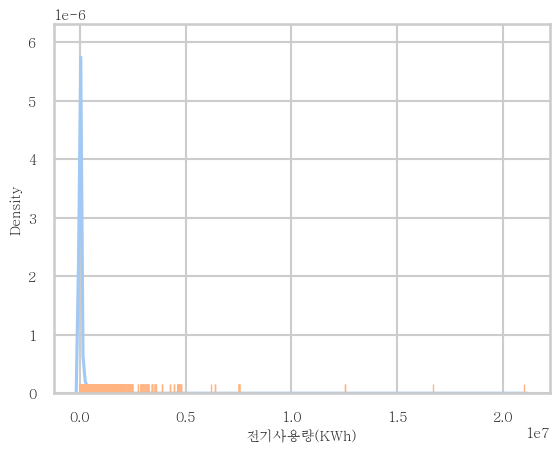

In [310]:
plt.rcParams['font.family'] = 'Batang'
sns.kdeplot(x=df['전기사용량(KWh)'])
sns.rugplot(x=df["전기사용량(KWh)"])
plt.show()

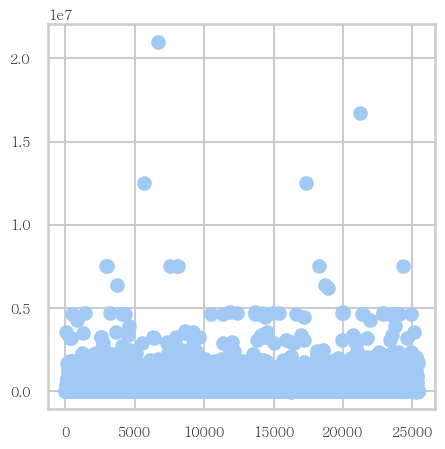

In [311]:
fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')
plt.scatter(range(len(df)), df['전기사용량(KWh)'])
plt.show()

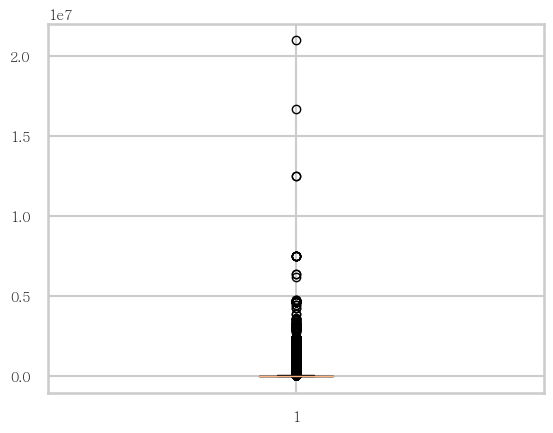

In [312]:
plt.boxplot(df['전기사용량(KWh)'])
plt.show()

In [313]:
# 1.5*IQR 이상의 값 개수 확인
Q1 = df['전기사용량(KWh)'].sort_values().quantile(.25)
Q3 = df['전기사용량(KWh)'].sort_values().quantile(.75)
IQR = Q3 - Q1
max_standard = Q3 + (1.5 * IQR)
len(df[df['전기사용량(KWh)']>max_standard])

4263

In [314]:
max_standard

42667.70833333332

In [315]:
df.shape

(25401, 21)

In [316]:
# 3 표준편차 이상의 값을 제거
mean = df['전기사용량(KWh)'].mean()
std_dev = df['전기사용량(KWh)'].std()
threshold = 3 * std_dev

df = df[(df['전기사용량(KWh)'] >= (mean - threshold)) & (df['전기사용량(KWh)'] <= (mean + threshold))]

In [317]:
df_filtered.shape

(25052, 21)

In [318]:
mean = np.mean(df['전기사용량(KWh)'])

std = np.std(df['전기사용량(KWh)'])
threshold = 3

outlier = [] 

for i in df['전기사용량(KWh)']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 

#print('데이터셋 내의 이상값은', outlier)
len(outlier)

670

349개의 행 지우기로 결정

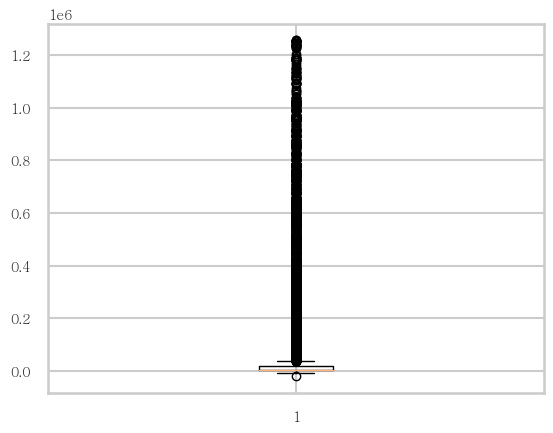

In [319]:
plt.boxplot(df['전기사용량(KWh)'])
plt.show()

## 가스사용량

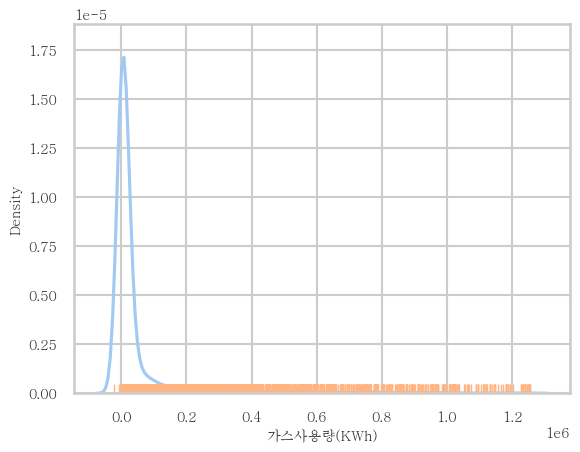

In [320]:
sns.kdeplot(x=df['가스사용량(KWh)'])
sns.rugplot(x=df["가스사용량(KWh)"])
plt.show()

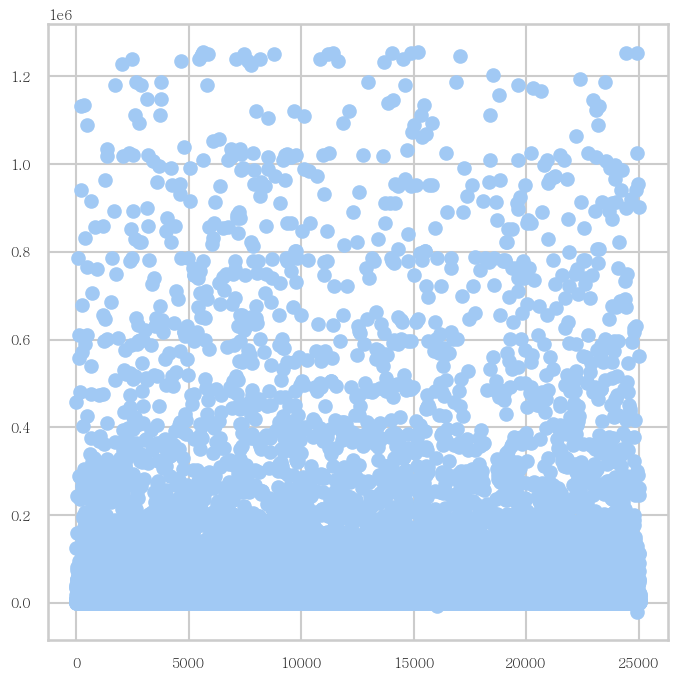

In [321]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
plt.scatter(range(len(df)), df['가스사용량(KWh)'])
plt.show()

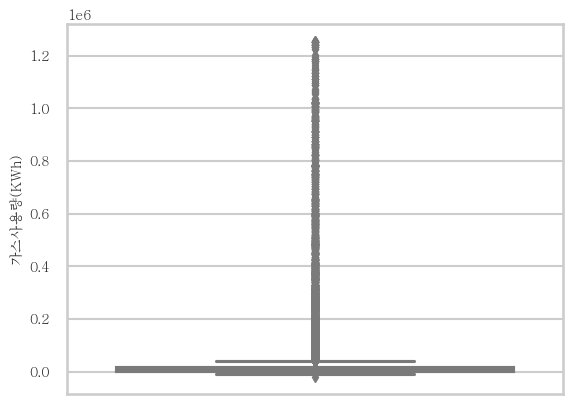

In [322]:
sns.boxplot(y=df['가스사용량(KWh)'])
plt.show()

In [323]:
# 1.5*IQR 이상의 값 개수 확인
Q1 = df['가스사용량(KWh)'].sort_values().quantile(.25)
Q3 = df['가스사용량(KWh)'].sort_values().quantile(.75)
IQR = Q3 - Q1
max_standard = Q3 + (1.5 * IQR)
len(df[df['가스사용량(KWh)']>max_standard])

4084

In [324]:
mean = np.mean(df['가스사용량(KWh)'])

std = np.std(df['가스사용량(KWh)'])
threshold = 3

outlier = [] 

for i in df['가스사용량(KWh)']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 

#print('데이터셋 내의 이상값은', outlier)
len(outlier)

670

In [325]:
# 3 표준편차 이상의 값을 제거
mean = df['가스사용량(KWh)'].mean()
std_dev = df['가스사용량(KWh)'].std()
threshold = 3 * std_dev

df = df[(df['가스사용량(KWh)'] >= (mean - threshold)) & (df['가스사용량(KWh)'] <= (mean + threshold))]

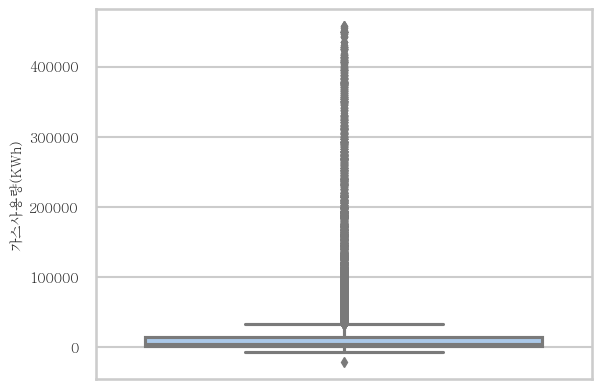

In [326]:
sns.boxplot(y=df['가스사용량(KWh)'])
plt.show()

## 현장소방서거리

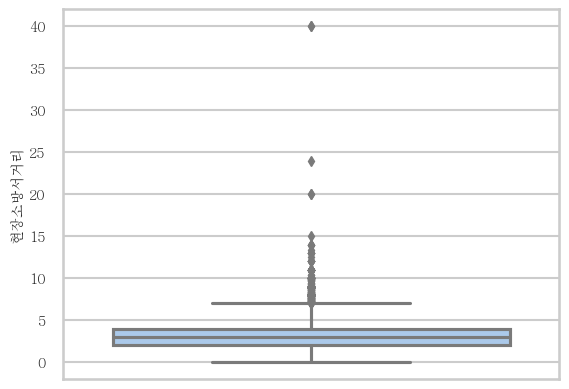

In [327]:
sns.boxplot(y=df['현장소방서거리'])
plt.show()

In [328]:
Q1 = df['현장소방서거리'].sort_values().quantile(.25)
Q3 = df['현장소방서거리'].sort_values().quantile(.75)
IQR = Q3 - Q1
max_standard = Q3 + (1.5 * IQR)
len(df[df['현장소방서거리']>max_standard])

618

In [329]:
mean = np.mean(df['현장소방서거리'])

std = np.std(df['현장소방서거리'])
threshold = 3

outlier = [] 

for i in df['현장소방서거리']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 

#print('데이터셋 내의 이상값은', outlier)
len(outlier)

245

In [330]:
mean = df['현장소방서거리'].mean()
std_dev = df['현장소방서거리'].std()
threshold = 3 * std_dev
threshold

5.344980365850418

In [331]:
df['현장소방서거리'].value_counts()

현장소방서거리
3.0     5275
2.0     4797
4.0     3901
1.0     2779
5.0     2086
        ... 
13.4       1
24.0       1
12.5       1
15.0       1
9.2        1
Name: count, Length: 110, dtype: int64

In [332]:
df['현장소방서거리'].describe()

count    24382.000000
mean         3.231511
std          1.781660
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         40.000000
Name: 현장소방서거리, dtype: float64

In [333]:
df[df['현장소방서거리'] >= 17]

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh)
10758,0,2,20190406,11,40.0,2.0,0.0,부주의,판매시설,Y,...,0.9,180.0,29.0,1670,4418,127.014114,37.489771,32.064897,2846.666667,2846.666667
12161,0,3,20190726,12,20.0,1.0,0.0,부주의,단독주택,N,...,1.5,180.0,97.0,1927,11,127.088548,37.601704,65.481849,988.454545,988.454545
13414,0,4,20191108,7,40.0,2.0,0.0,기계적 요인,음식점,Y,...,0.7,360.0,44.0,1964,233,127.081186,37.490639,47.026062,3813.000000,3813.000000
13530,1,4,20191117,13,24.0,1.0,0.0,기계적 요인,단독주택,N,...,3.8,70.0,81.0,731,5783,127.058378,37.579435,55.048752,3301.750000,3301.750000
13890,0,4,20191219,9,20.0,2.0,0.0,전기적 요인,일반업무,Y,...,4.5,320.0,52.0,1878,77,127.034785,37.668052,50.175174,969.666667,969.666667


In [337]:
df_outlier = df[df['현장소방서거리'] >= 17]

In [341]:
def replace_distance1(df):
    for i, row in df.iterrows():
        if row['현장소방서거리'] >= 17:
            lat1, lon1 = row['lat'], row['lon']
            min_distance = float('inf')
            closest_distance = None

            for j, neighbor_row in df.iterrows():
                if i != j:  # 같은 행은 제외
                    lat2, lon2 = neighbor_row['lat'], neighbor_row['lon']
                    distance = haversine_distance(lat1, lon1, lat2, lon2)

                    if distance < min_distance:
                        min_distance = distance
                        closest_distance = neighbor_row['현장소방서거리']

            if closest_distance is not None:
                df.at[i, '현장소방서거리'] = closest_distance

In [342]:
# 현장소방서거리가 17이상인 데이터들은 가장 가까운 건물의 현장소방서거리로 대체
replace_distance1(df)

In [343]:
df['현장소방서거리'].describe()

count    24382.000000
mean         3.226273
std          1.738651
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         15.000000
Name: 현장소방서거리, dtype: float64

## 현장안전센터거리

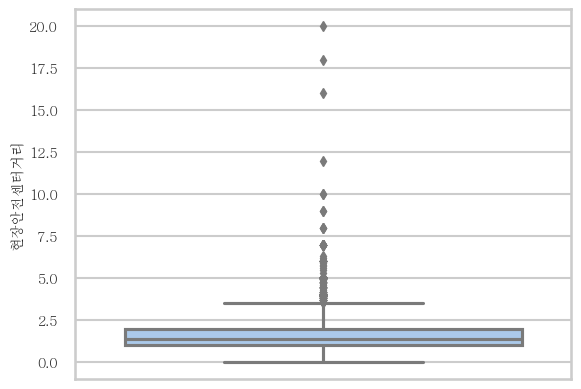

In [344]:
sns.boxplot(y=df['현장안전센터거리'])
plt.show()

In [346]:
df['현장안전센터거리'].describe()

count    24382.000000
mean         1.618255
std          0.906561
min          0.000000
25%          1.000000
50%          1.400000
75%          2.000000
max         20.000000
Name: 현장안전센터거리, dtype: float64

In [349]:
def replace_distance2(df):
    for i, row in df.iterrows():
        if row['현장안전센터거리'] >= 10:
            lat1, lon1 = row['lat'], row['lon']
            min_distance = float('inf')
            closest_distance = None

            for j, neighbor_row in df.iterrows():
                if i != j:  # 같은 행은 제외
                    lat2, lon2 = neighbor_row['lat'], neighbor_row['lon']
                    distance = haversine_distance(lat1, lon1, lat2, lon2)

                    if distance < min_distance:
                        min_distance = distance
                        closest_distance = neighbor_row['현장안전센터거리']

            if closest_distance is not None:
                df.at[i, '현장안전센터거리'] = closest_distance

In [350]:
# 현장안전센터거리가 10이상인 데이터들은 가장 가까운 건물의 현장소방서거리로 대체
replace_distance2(df)

In [351]:
df['현장안전센터거리'].describe()

count    24382.000000
mean         1.615302
std          0.882369
min          0.000000
25%          1.000000
50%          1.400000
75%          2.000000
max          9.000000
Name: 현장안전센터거리, dtype: float64

## 시간단위 가시거리

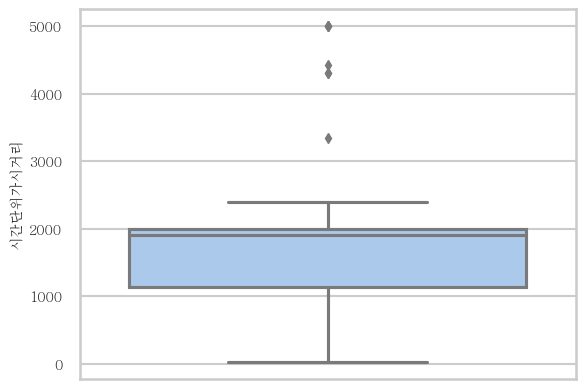

In [352]:
sns.boxplot(y=df['시간단위가시거리'])
plt.show()

In [353]:
df[df['시간단위가시거리']>3000]['시간단위가시거리'].value_counts()

시간단위가시거리
5000    3
4300    2
3351    1
4430    1
Name: count, dtype: int64

In [354]:
# 박스플롯 보고 3000 이상의 값들은 제거
df = df[df["시간단위가시거리"]<3000]

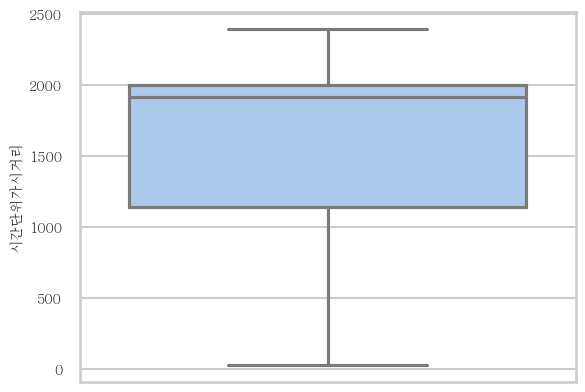

In [355]:
sns.boxplot(y=df['시간단위가시거리'])
plt.show()

## 재산피해액

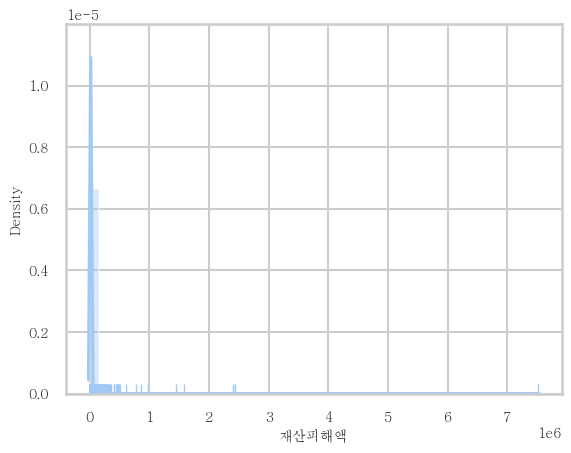

In [356]:
sns.distplot(df[df['재산피해액'] != 71613336]['재산피해액'], kde=True, rug=True)
plt.show()

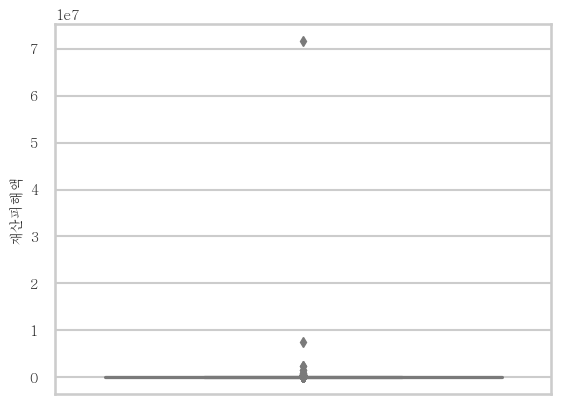

In [357]:
sns.boxplot(y=df['재산피해액'])
plt.show()

In [358]:
mean = np.mean(df['재산피해액'])

std = np.std(df['재산피해액'])
threshold = 3

outlier = [] 

for i in df['재산피해액']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 

#print('데이터셋 내의 이상값은', outlier)
len(outlier)

6

In [359]:
# 3 표준편차 이상의 값을 제거
mean = df['재산피해액'].mean()
std_dev = df['재산피해액'].std()
threshold = 3 * std_dev

df = df[(df['재산피해액'] >= (mean - threshold)) & (df['재산피해액'] <= (mean + threshold))]

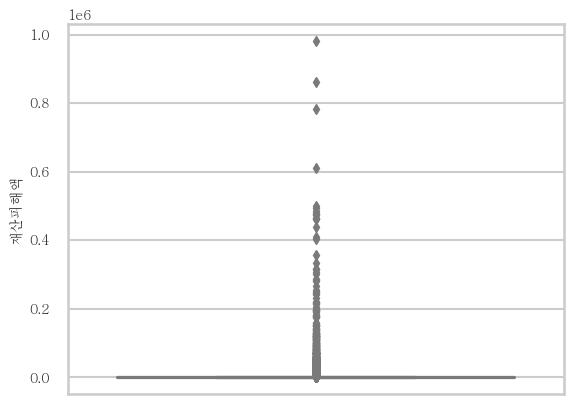

In [360]:
sns.boxplot(y=df['재산피해액'])
plt.show()

## 상관분석

In [361]:
plt.rc('font', family='Malgun Gothic')

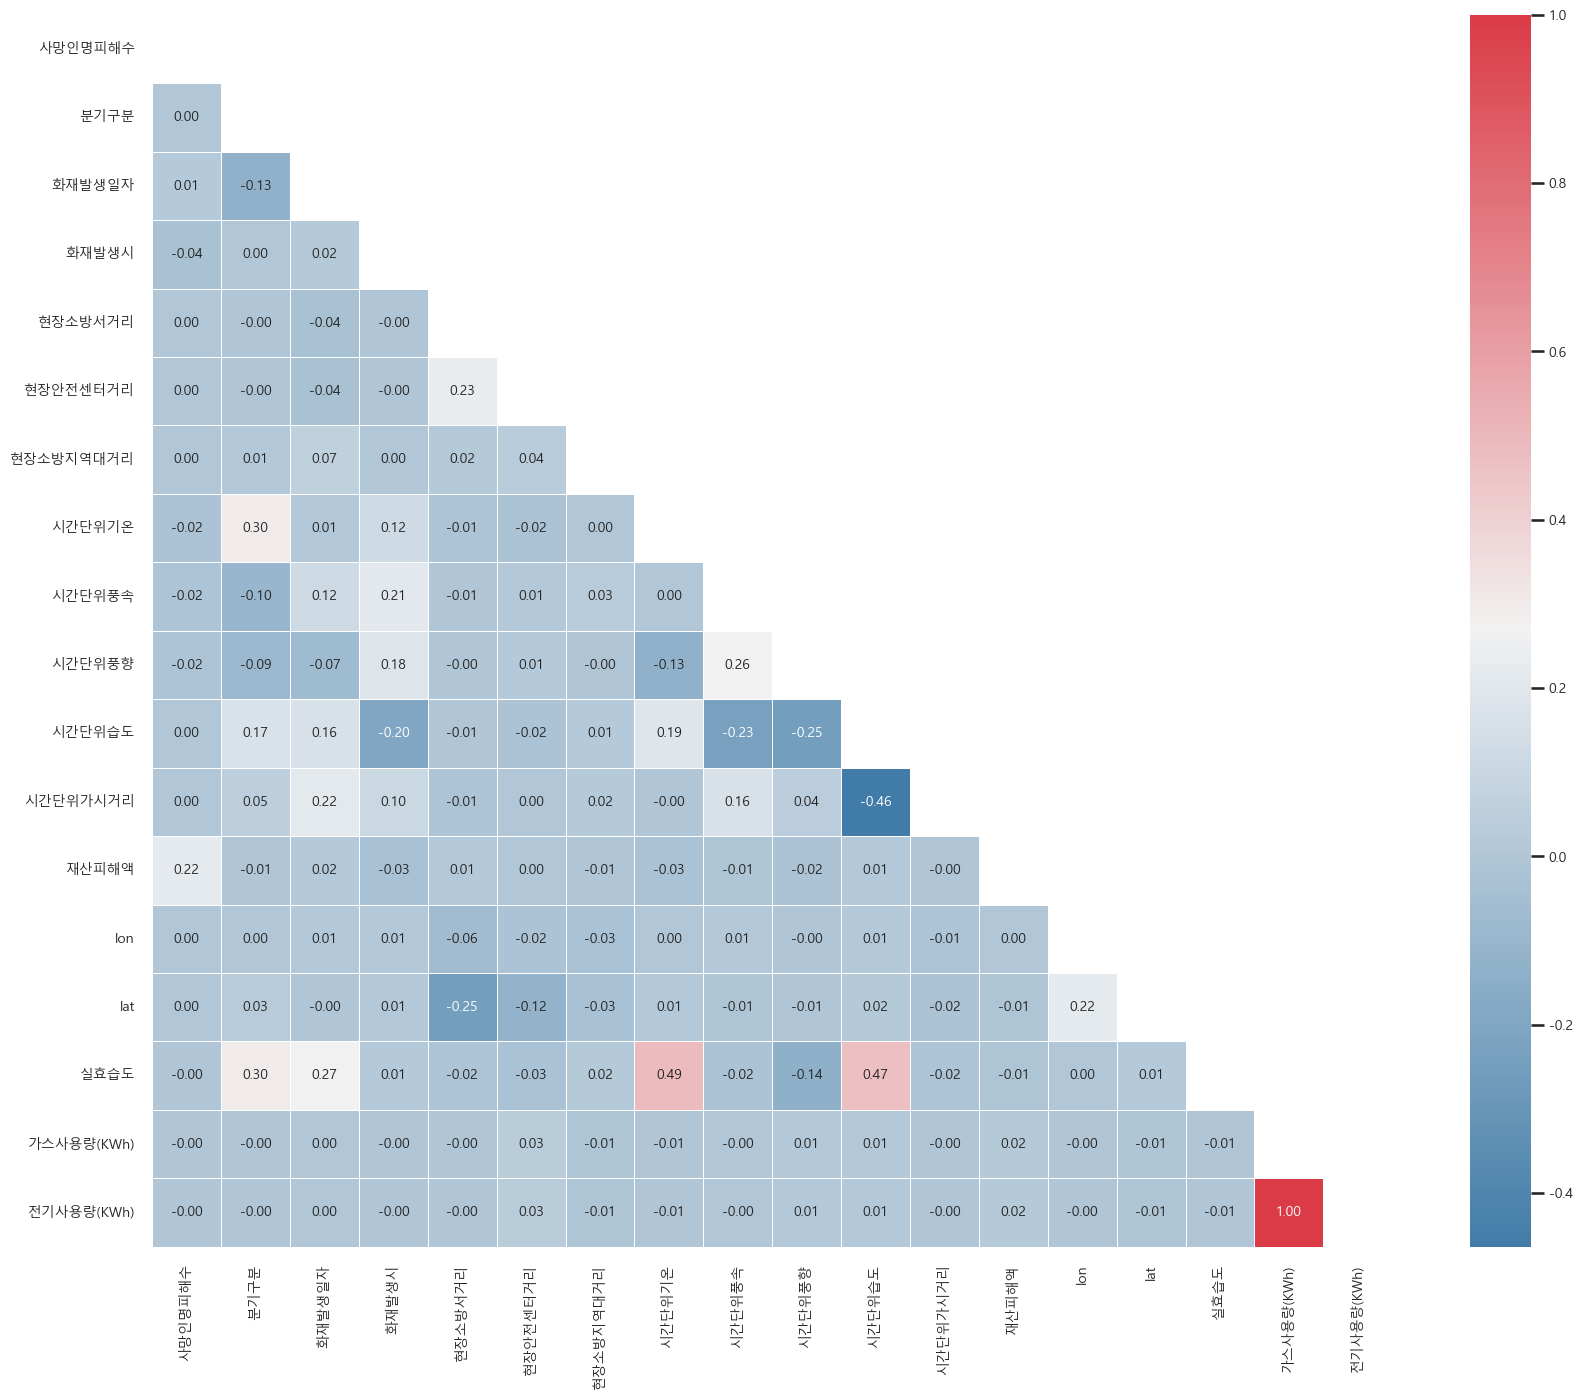

In [365]:
cmap = sns.diverging_palette(240,10,n=9, as_cmap=True)

plt.figure(figsize=(20,16))
mask = np.zeros_like(df.corr(numeric_only=True), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap=cmap, mask=mask,linewidths=.5,fmt='.2f', annot_kws ={'size' :10})

plt.show()

In [366]:
cor_matrix = df.corr(numeric_only = True).abs()
cor_matrix

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,시간단위기온,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh)
사망인명피해수,1.000000,0.000293,0.011363,0.036098,0.004893,0.002717,0.001952,0.019235,0.015133,0.016108,0.003570,0.003869,0.222213,0.002915,0.002191,0.003849,0.002616,0.002616
분기구분,0.000293,1.000000,0.127727,0.001902,0.002762,0.001870,0.009601,0.299396,0.100861,0.088991,0.166269,0.054514,0.005024,0.001950,0.025412,0.298479,0.000901,0.000901
화재발생일자,0.011363,0.127727,1.000000,0.018075,0.036844,0.036600,0.067179,0.005788,0.116955,0.069236,0.163015,0.215835,0.015893,0.008553,0.000708,0.268457,0.001277,0.001277
화재발생시,0.036098,0.001902,0.018075,1.000000,0.002446,0.001846,0.000928,0.122141,0.206435,0.184418,0.200174,0.104071,0.033192,0.006956,0.005897,0.011695,0.004388,0.004388
현장소방서거리,0.004893,0.002762,0.036844,0.002446,1.000000,0.233509,0.018004,0.013534,0.005570,0.004654,0.006146,0.013428,0.007748,0.063756,0.247966,0.016326,0.001639,0.001639
현장안전센터거리,0.002717,0.001870,0.036600,0.001846,0.233509,1.000000,0.038448,0.018120,0.009634,0.012992,0.021426,0.004209,0.004801,0.020549,0.117084,0.025869,0.030984,0.030984
현장소방지역대거리,0.001952,0.009601,0.067179,0.000928,0.018004,0.038448,1.000000,0.004659,0.025149,0.003012,0.012758,0.017438,0.005855,0.025287,0.033556,0.021664,0.006913,0.006913
시간단위기온,0.019235,0.299396,0.005788,0.122141,0.013534,0.018120,0.004659,1.000000,0.002830,0.131229,0.188923,0.002286,0.026155,0.001404,0.006001,0.488791,0.005813,0.005813
시간단위풍속,0.015133,0.100861,0.116955,0.206435,0.005570,0.009634,0.025149,0.002830,1.000000,0.262933,0.230554,0.161990,0.008271,0.005389,0.011964,0.020559,0.000225,0.000225
시간단위풍향,0.016108,0.088991,0.069236,0.184418,0.004654,0.012992,0.003012,0.131229,0.262933,1.000000,0.249513,0.040172,0.017897,0.002127,0.005175,0.142490,0.007809,0.007809


In [367]:
cor_matrix['사망인명피해수']

사망인명피해수       1.000000
분기구분          0.000293
화재발생일자        0.011363
화재발생시         0.036098
현장소방서거리       0.004893
현장안전센터거리      0.002717
현장소방지역대거리     0.001952
시간단위기온        0.019235
시간단위풍속        0.015133
시간단위풍향        0.016108
시간단위습도        0.003570
시간단위가시거리      0.003869
재산피해액         0.222213
lon           0.002915
lat           0.002191
실효습도          0.003849
가스사용량(KWh)    0.002616
전기사용량(KWh)    0.002616
Name: 사망인명피해수, dtype: float64

In [368]:
df_select = df[cor_matrix[cor_matrix['사망인명피해수'] >= 0.01]["사망인명피해수"].index]
df_select

,사망인명피해수,화재발생일자,화재발생시,시간단위기온,시간단위풍속,시간단위풍향,재산피해액
0,0,20170102,11,6.3,2.3,230.0,1551
1,0,20170102,12,7.6,2.1,230.0,275
2,0,20170102,14,9.2,3.1,200.0,113
3,0,20170102,15,8.3,3.6,250.0,51
4,0,20170102,18,6.4,2.1,270.0,100
...,...,...,...,...,...,...,...
25430,0,20221231,17,1.7,1.7,20.0,113
25431,0,20221231,20,-0.8,1.4,20.0,231
25432,0,20221231,20,-0.8,1.4,20.0,5352
25433,0,20221231,21,-1.0,0.9,340.0,258


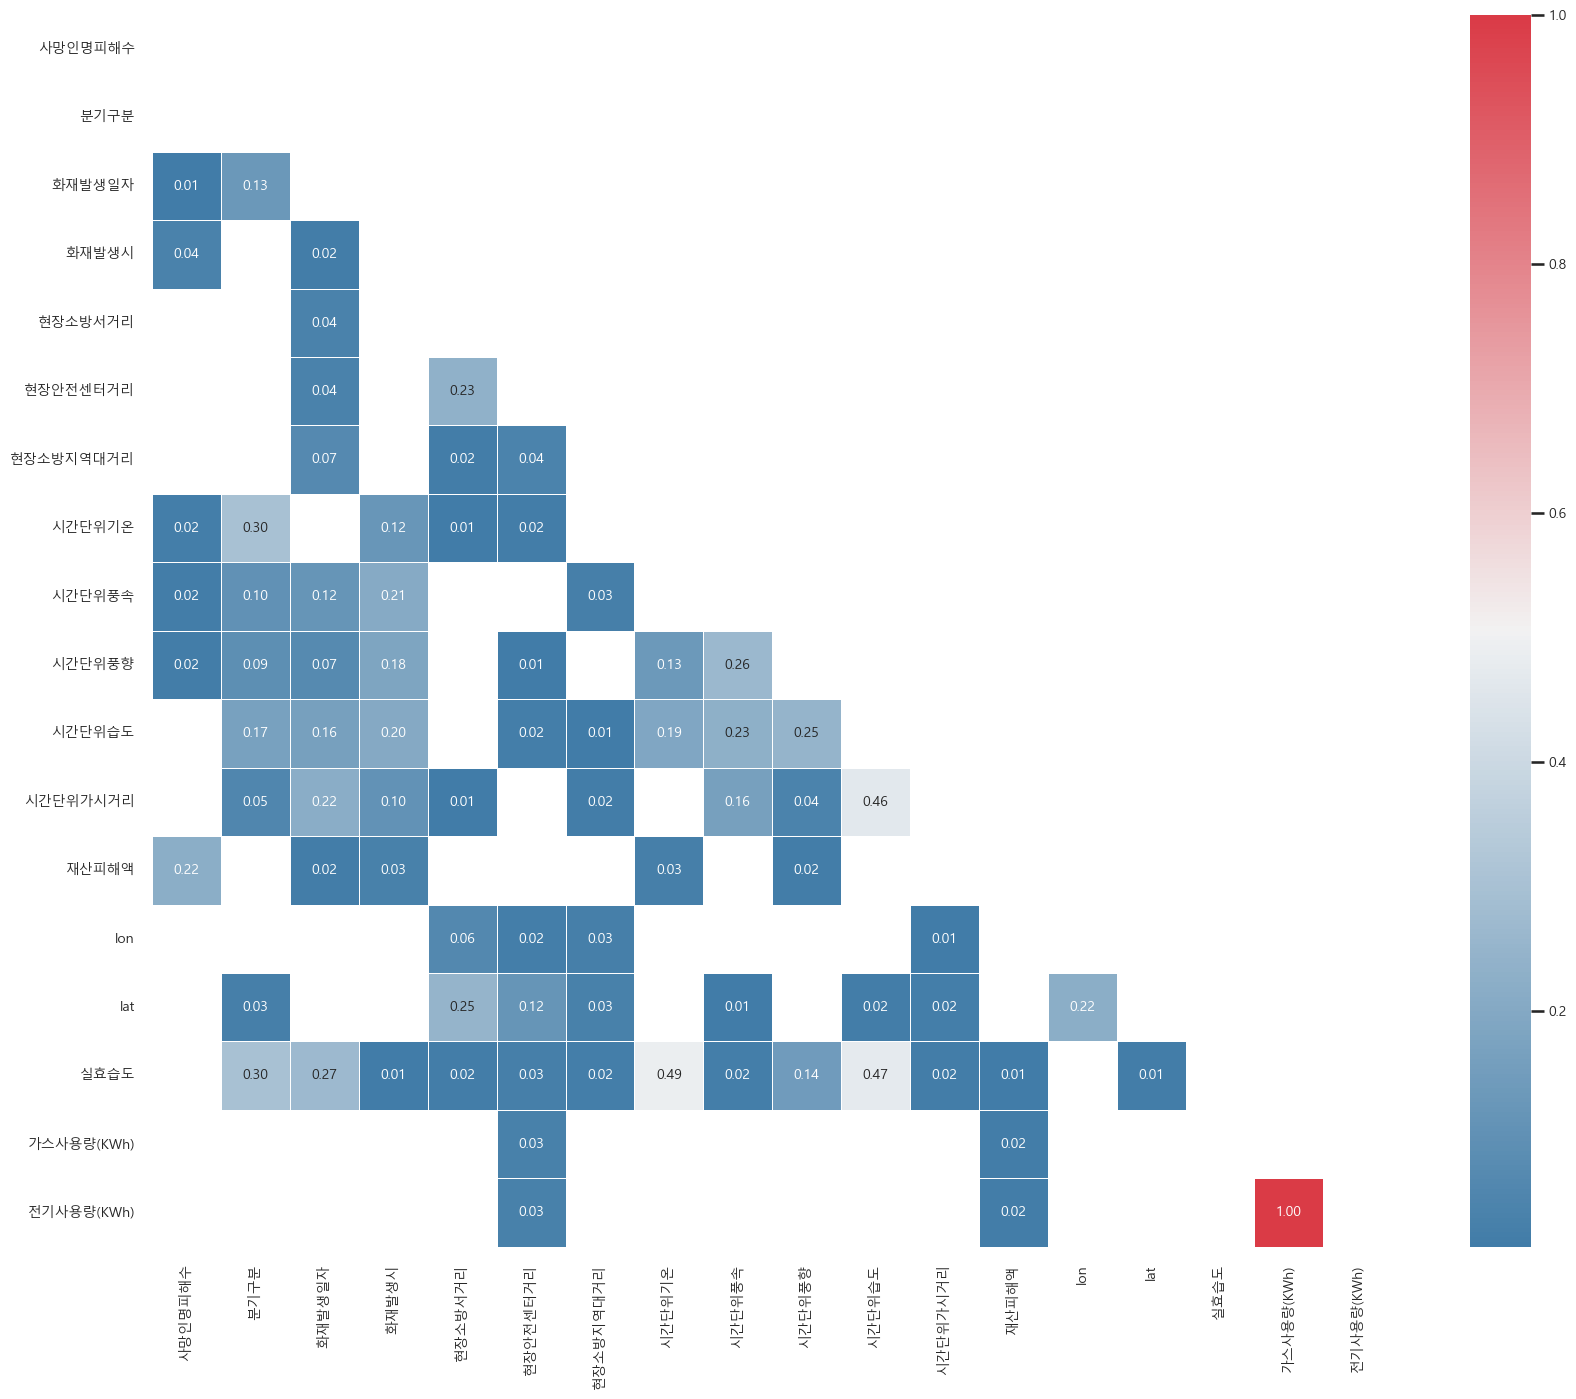

In [369]:
#상관관계가 0.01 이상인 변수들만
new_cor_matrix = cor_matrix[cor_matrix >= 0.01]
plt.figure(figsize=(20,16))
sns.heatmap(new_cor_matrix, annot=True, cmap=cmap, mask=mask,linewidths=.5,fmt='.2f', annot_kws ={'size' :10})

plt.show()

In [370]:
df.shape

(24369, 21)

In [371]:
df.to_csv(path + 'preprocessed_data.csv', encoding="utf-8-sig", index=False)